In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# CSV functions
def csv_to_dict(file):
    """
    read CSV file and create dict with key for each head containing a list of column entries for respective head
    
    :param file: path to CSV file to read
    :return: created dictionary
    """
    d = {}
    with open(file) as fin:
        reader = csv.reader(fin)
        headers = next(reader, None)
        for h in headers:
            d[h] = []
        for row in reader:
            for h, entry in zip(headers,row):
                d[h].append(entry)
    return d


def print_csv_dict(d):
    """
    print CSV dictionary in formatted way
    
    :param d: dict of CSV file to print
    :return:
    """
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(d)

In [3]:
# IMU data dict functions
def extract_acc(d):
    """
    extract acceleration vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: a (numpy array)
    """
    a = np.array(d['a'], dtype='float32')
    return a

def extract_vel(d):
    """
    extract velocity vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: v (numpy array)
    """
    v = np.array(d['v'], dtype='float32')
    return v

def extract_pos(d):
    """
    extract position vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: p (numpy array)
    """
    p = np.array(d['d'], dtype='float32')
    return p

def extract_time(d):
    """
    extract time vector for IMU data run dict (in seconds)
    
    :param d: dict of CSV file of IMU data run
    :return: time
    """
    timestamps = np.array(d['t'], dtype='float32')
    return timestamps

In [4]:
# read all data files for 1d transformation with single filter and 6 IMUS
data_6imu_1d_trans_single = []
for run in range(5):
    run_name = 'run' + str(run + 1)
    run_data_file = 'elevator_tests/filtering_1d_transformation/6imus/ele_6imus_' + run_name + '.csv'
    run_dict = csv_to_dict(run_data_file)
    data_6imu_1d_trans_single.append(run_dict)
    
# read all data files for 1d transformation with multiple filters and 4 IMUS
data_4imu_1d_trans_multi = []
for run in range(5):
    run_name = 'run' + str(run + 1)
    run_data_file = 'elevator_tests/filtering_1d_transformation_multi/4imus/ele_4imus_filtermulti_' + run_name + '.csv'
    run_dict = csv_to_dict(run_data_file)
    data_4imu_1d_trans_multi.append(run_dict)

# read all data files for 1d transformation with multiple filters and 6 IMUS
data_6imu_1d_trans_multi = []
for run in range(5):
    run_name = 'run' + str(run + 1)
    run_data_file = 'elevator_tests/filtering_1d_transformation_multi/6imus/ele_6imus_multifilter_' + run_name + '.csv'
    run_dict = csv_to_dict(run_data_file)
    data_6imu_1d_trans_multi.append(run_dict)
    
# read all data files without filtering and 4 IMUs
data_4imu_no_filter = []
for run in range(4):
    run_name = 'run' + str(run + 1)
    run_data_file = 'elevator_tests/no_filtering/4imus/ele_4imus_nofilter_' + run_name + '.csv'
    run_dict = csv_to_dict(run_data_file)
    data_4imu_no_filter.append(run_dict)

In [5]:
def plot_run_data(run_dict):
    acc = extract_acc(run_dict)
    vel = extract_vel(run_dict)
    pos = extract_pos(run_dict)
    time = extract_time(run_dict)
    
    f, axarr = plt.subplots(3, 1, figsize=(30,30))
    # plot corrected accelerations
    axarr[0].plot(time, acc, label='acc')
    axarr[0].set_title('Acceleration z-axis', fontsize=30)
    axarr[0].set_xlabel('time in seconds', fontsize=25)
    axarr[0].set_ylabel('Acceleration in m/s^2', fontsize=25)
    axarr[0].tick_params(axis='both', which='major', labelsize=20)
    axarr[0].legend(prop={'size': 20})
    
    # plot velocities
    axarr[1].plot(time, vel, label='vel')
    axarr[1].set_title('Velocity z-axis', fontsize=30)
    axarr[1].set_xlabel('time in seconds', fontsize=25)
    axarr[1].set_ylabel('Velocity in m/s', fontsize=25)
    axarr[1].tick_params(axis='both', which='major', labelsize=20)
    axarr[1].legend(prop={'size': 20})
    
    # plot position
    axarr[2].plot(time, pos, label='pos')
    axarr[2].set_title('Displacement z-axis', fontsize=30)
    axarr[2].set_xlabel('time in seconds', fontsize=25)
    axarr[2].set_ylabel('Displacement in m', fontsize=25)
    axarr[2].tick_params(axis='both', which='major', labelsize=20)
    axarr[2].legend(prop={'size': 20})
    
    plt.show()

Plots 5 runs for 6 IMUs using 1d transformation with single filter
Run 1


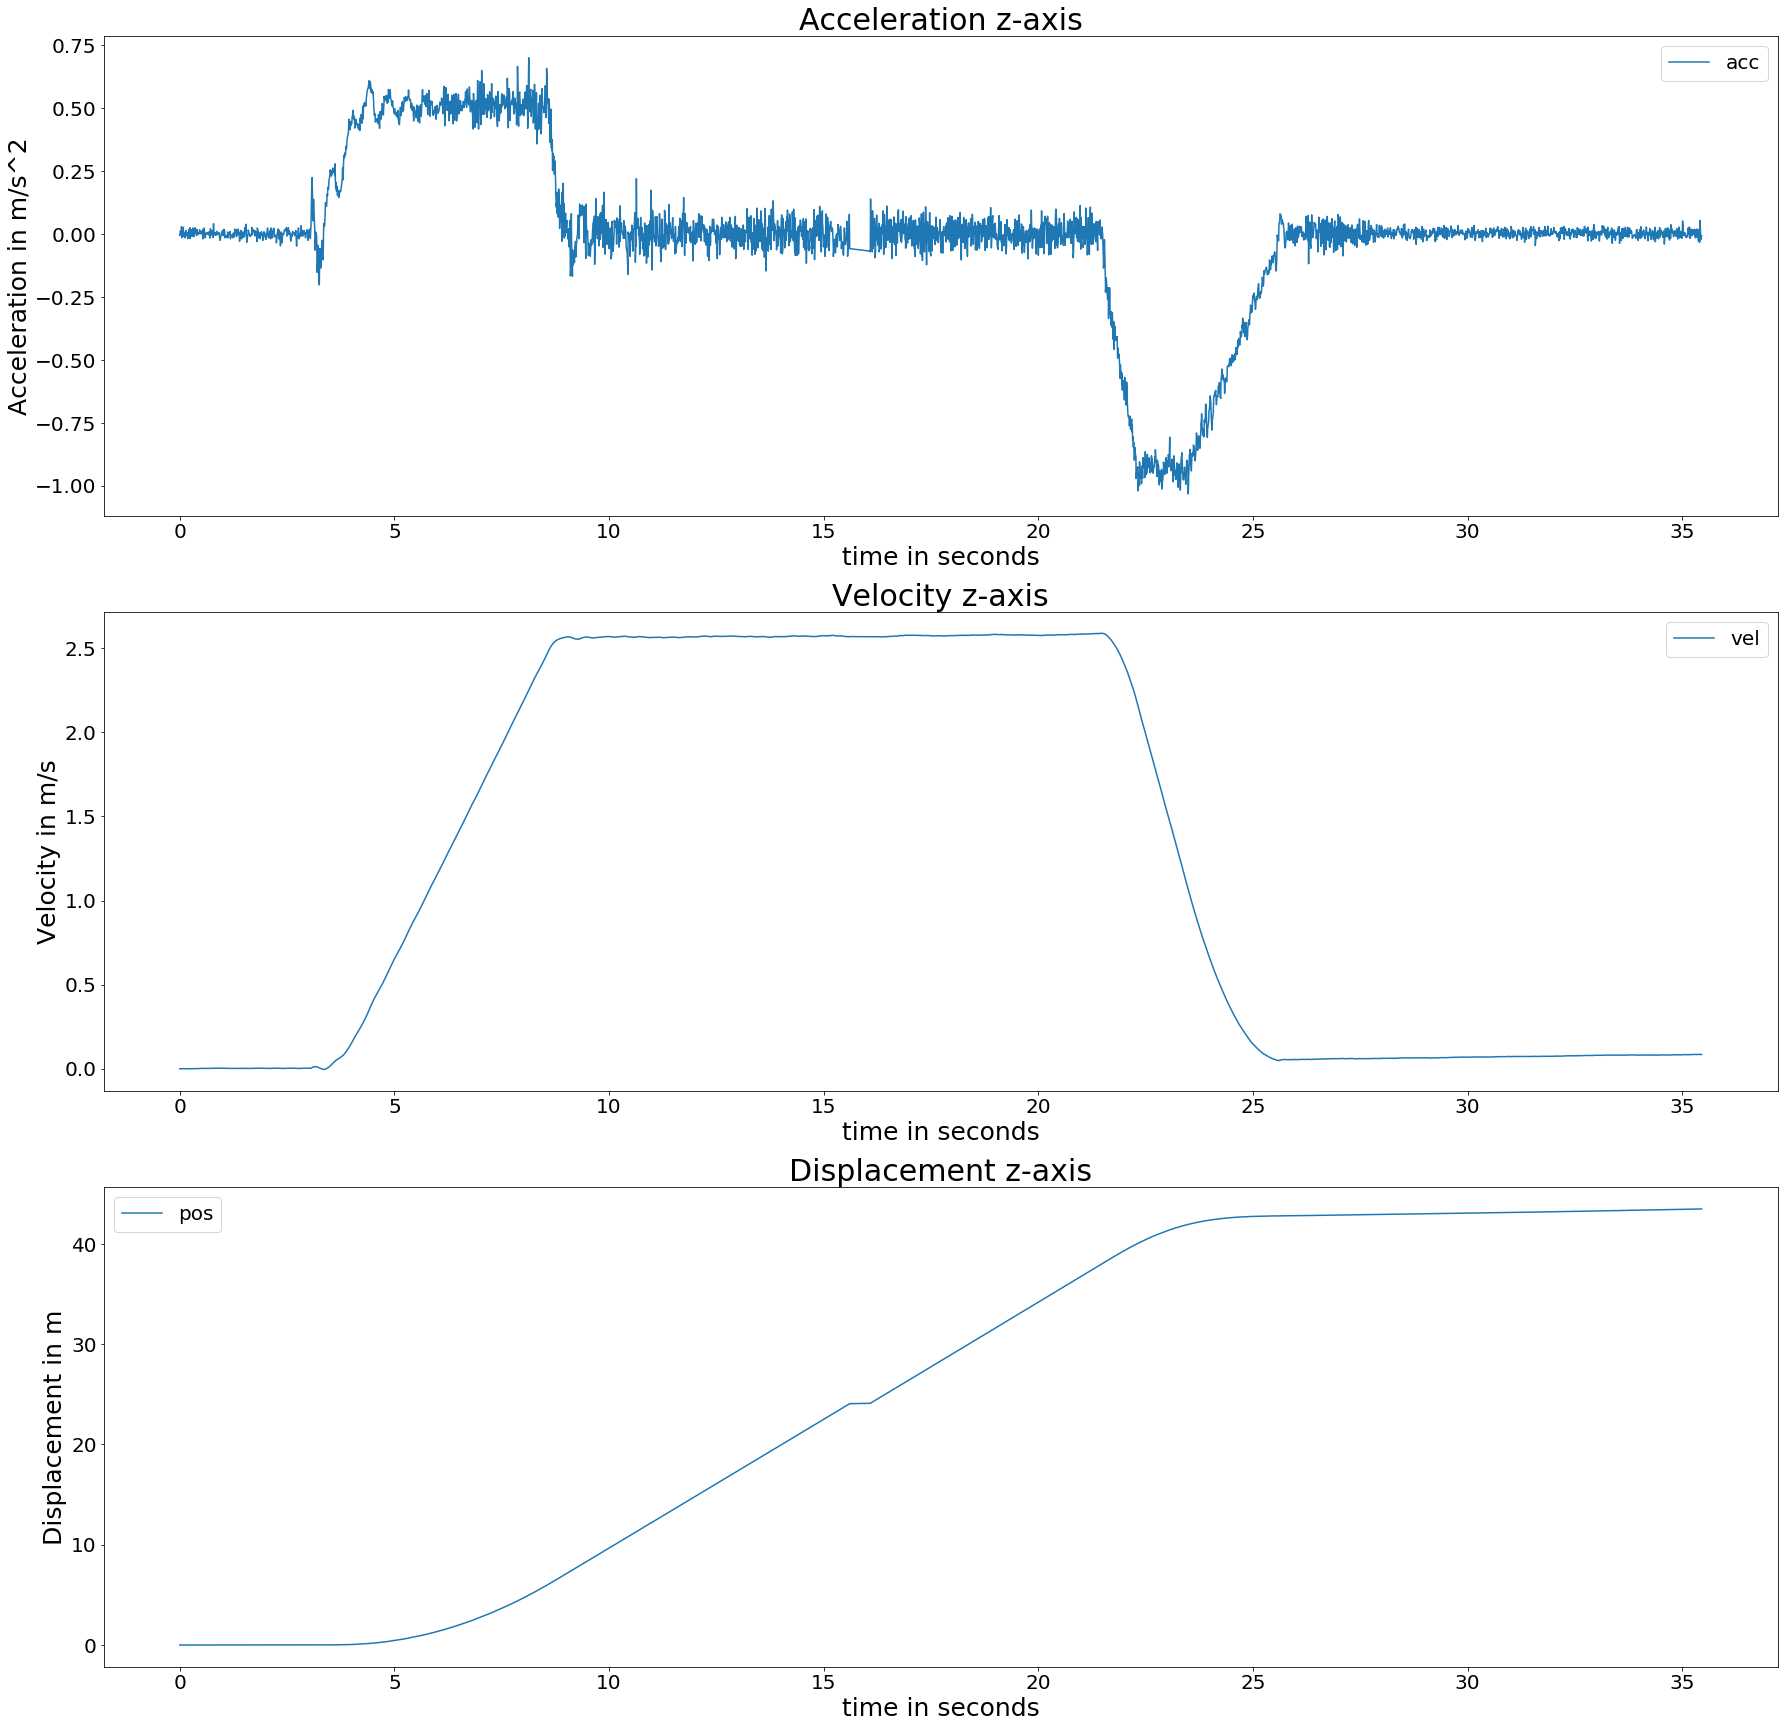

Run 2


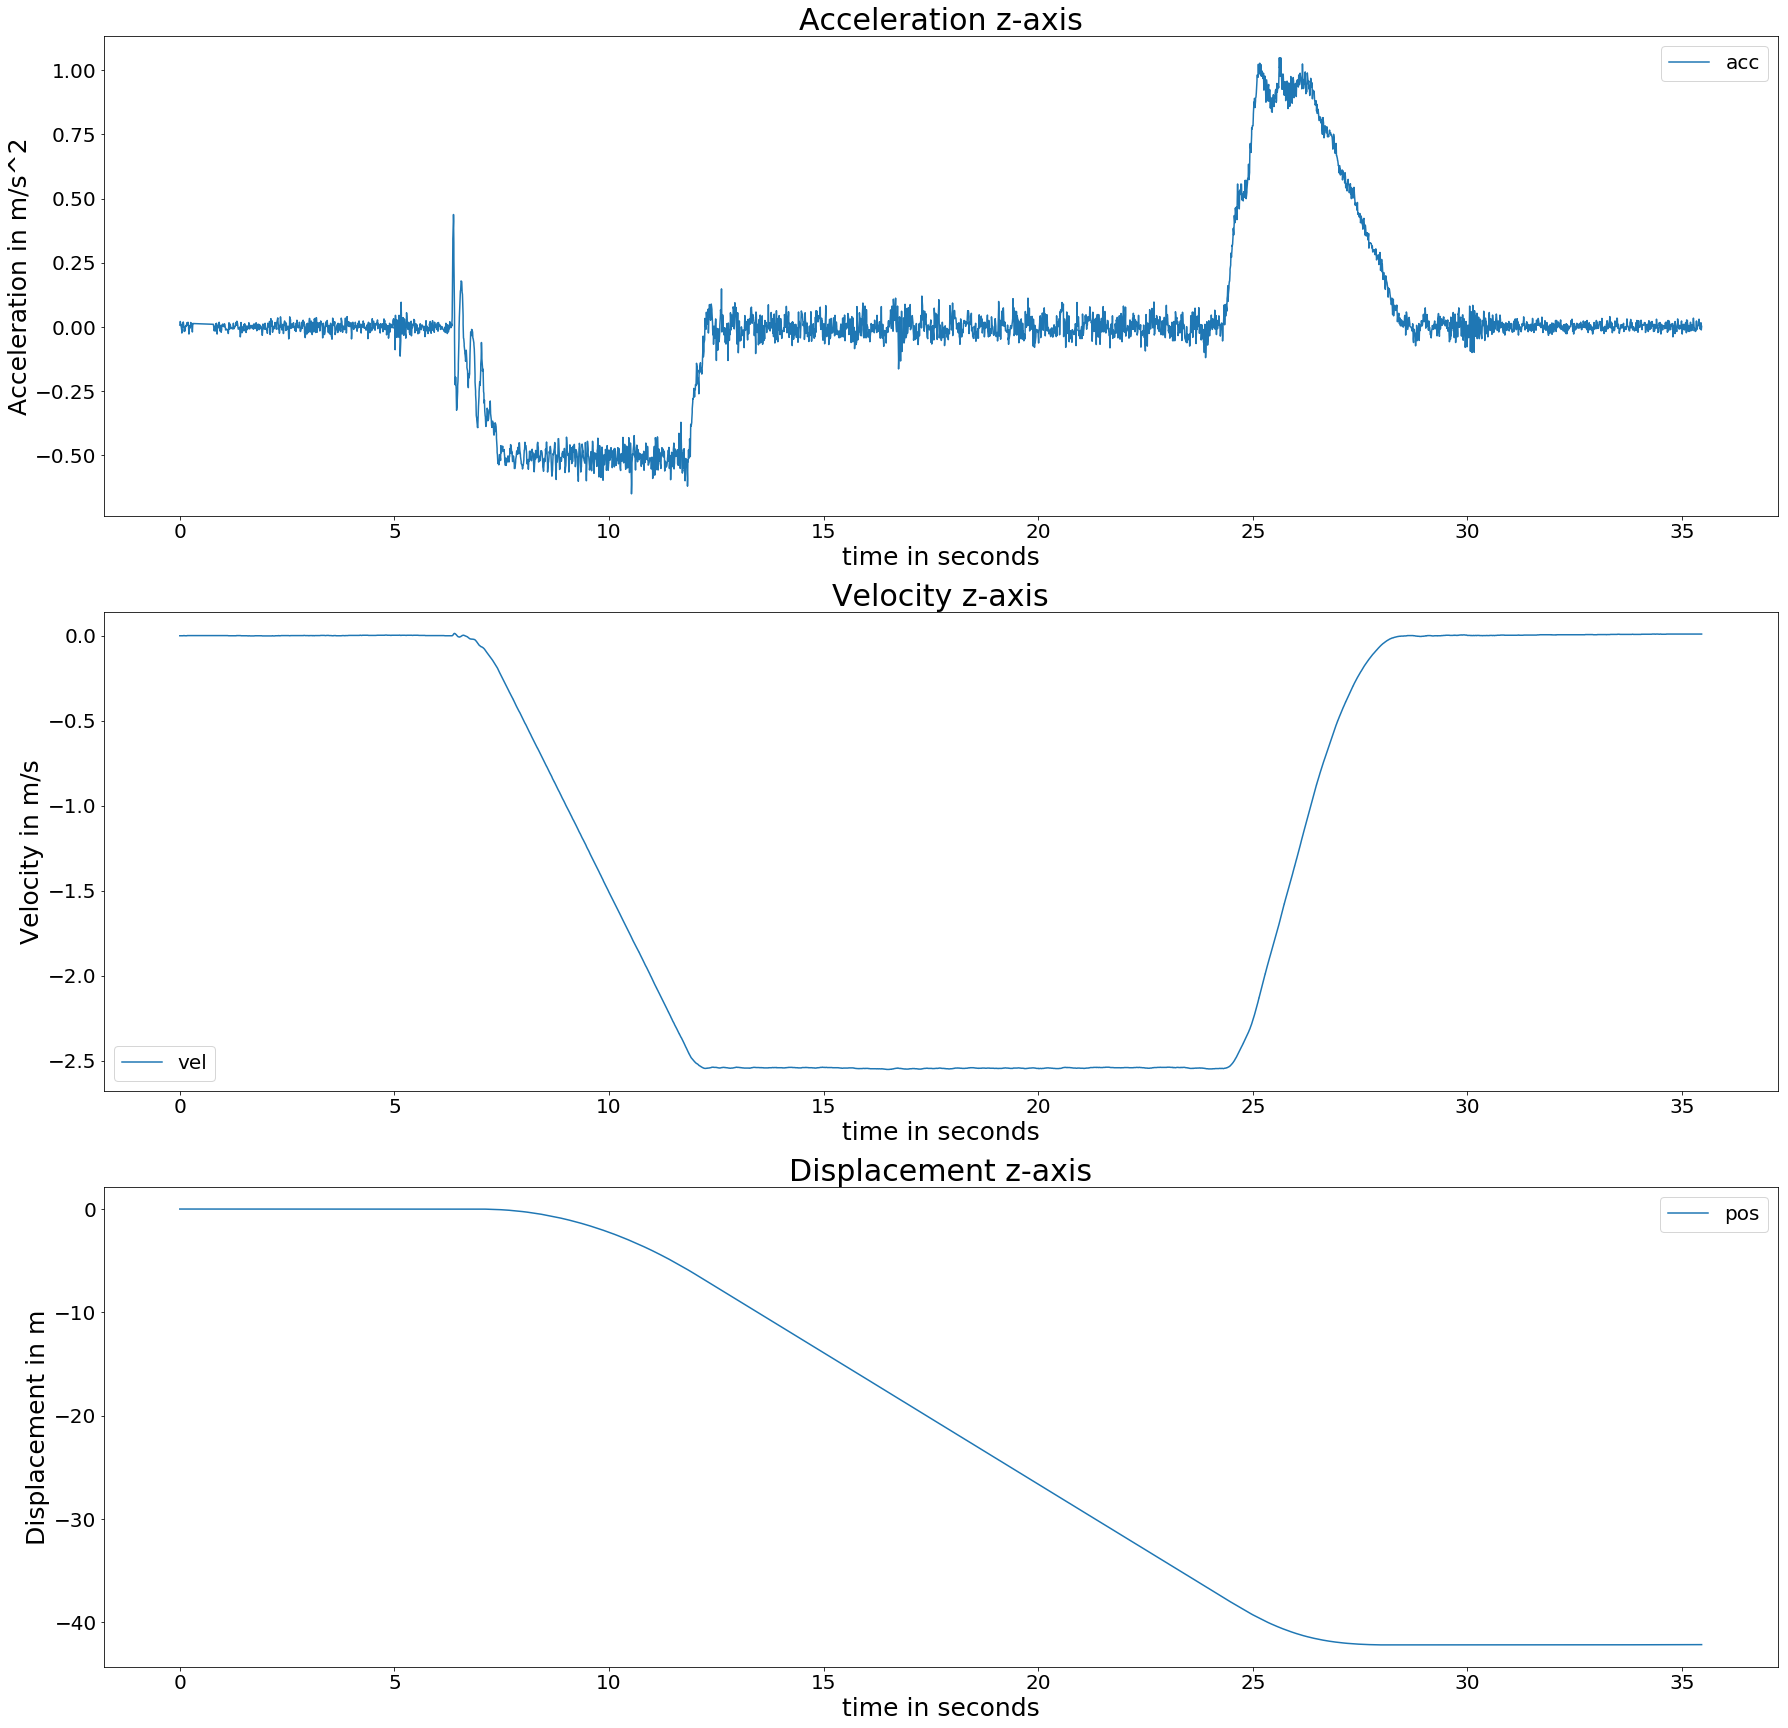

Run 3


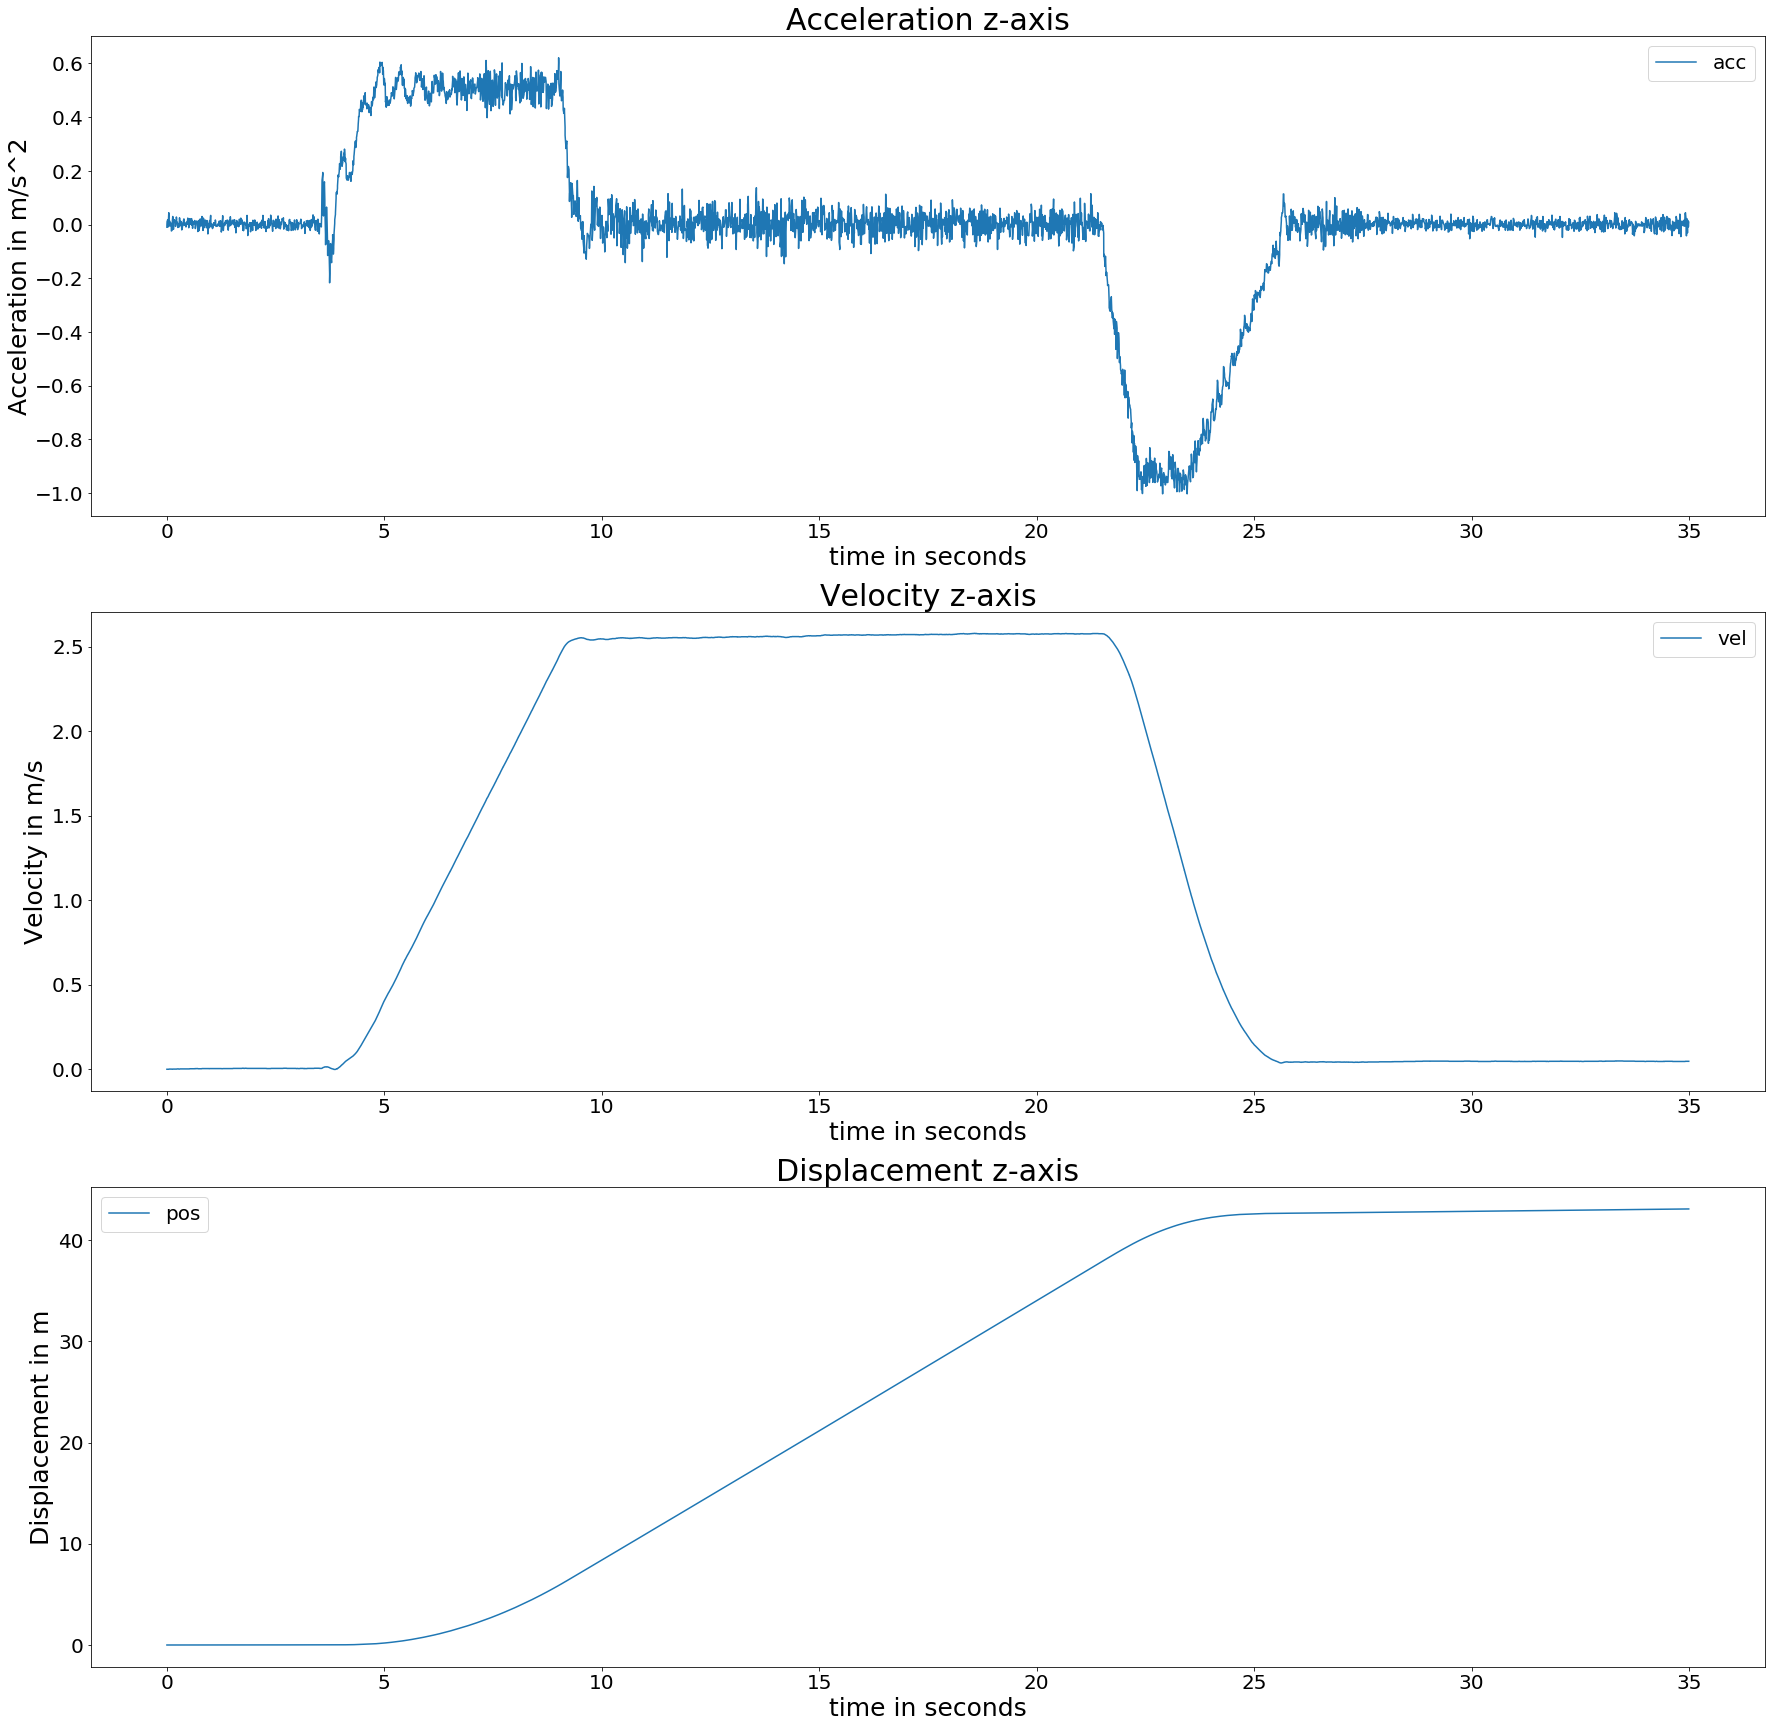

Run 4


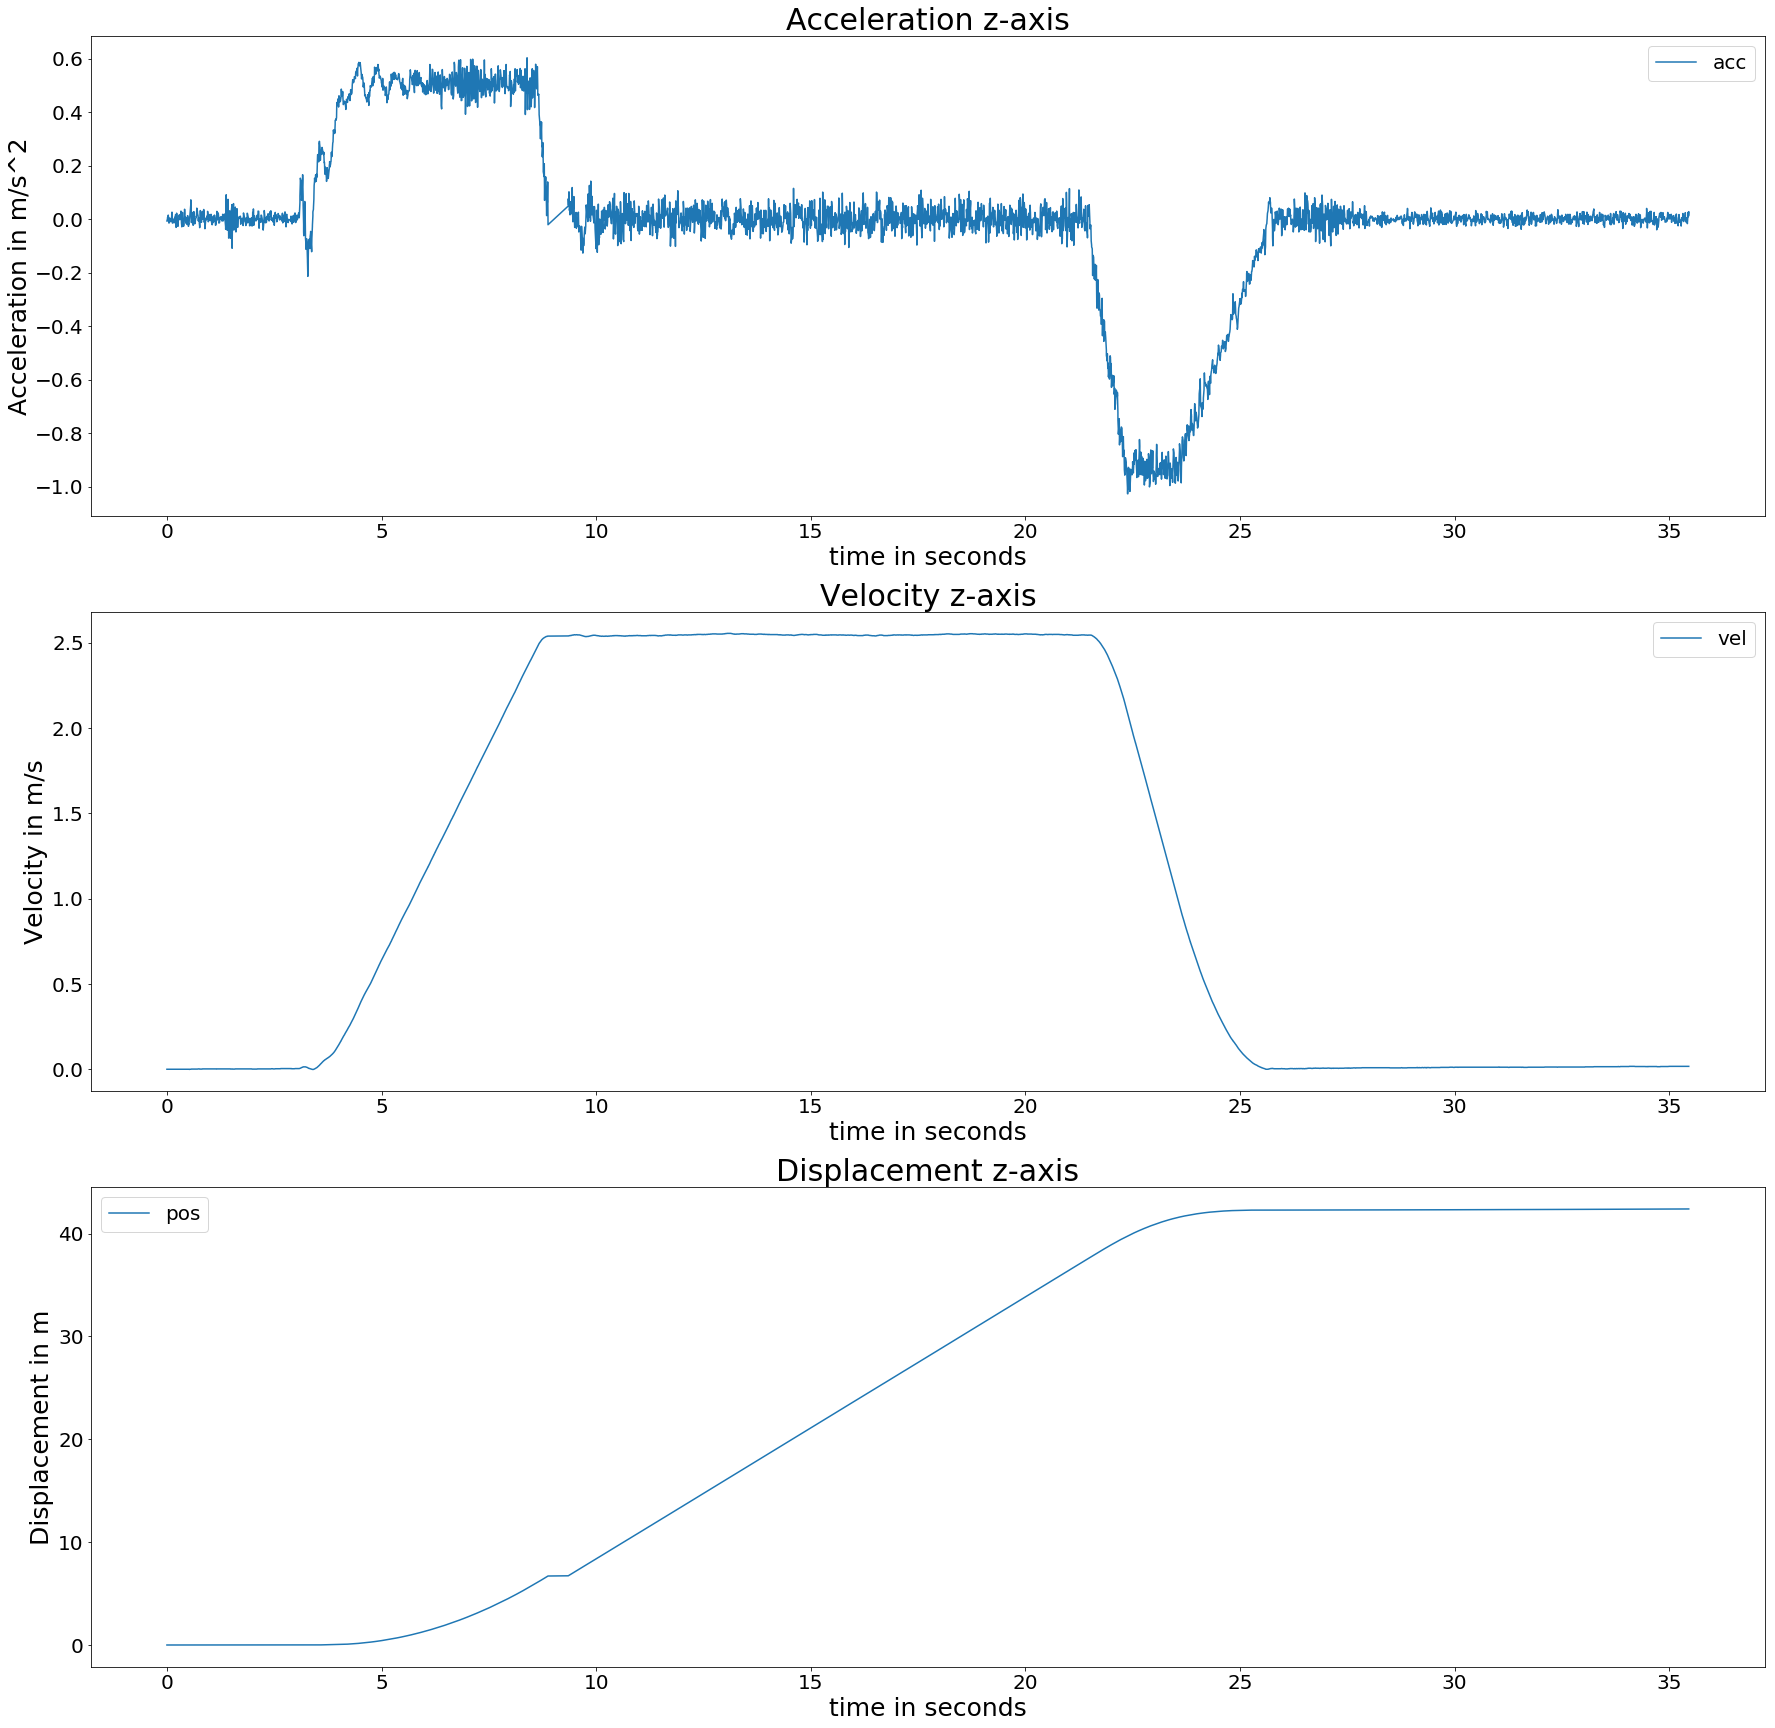

Run 5


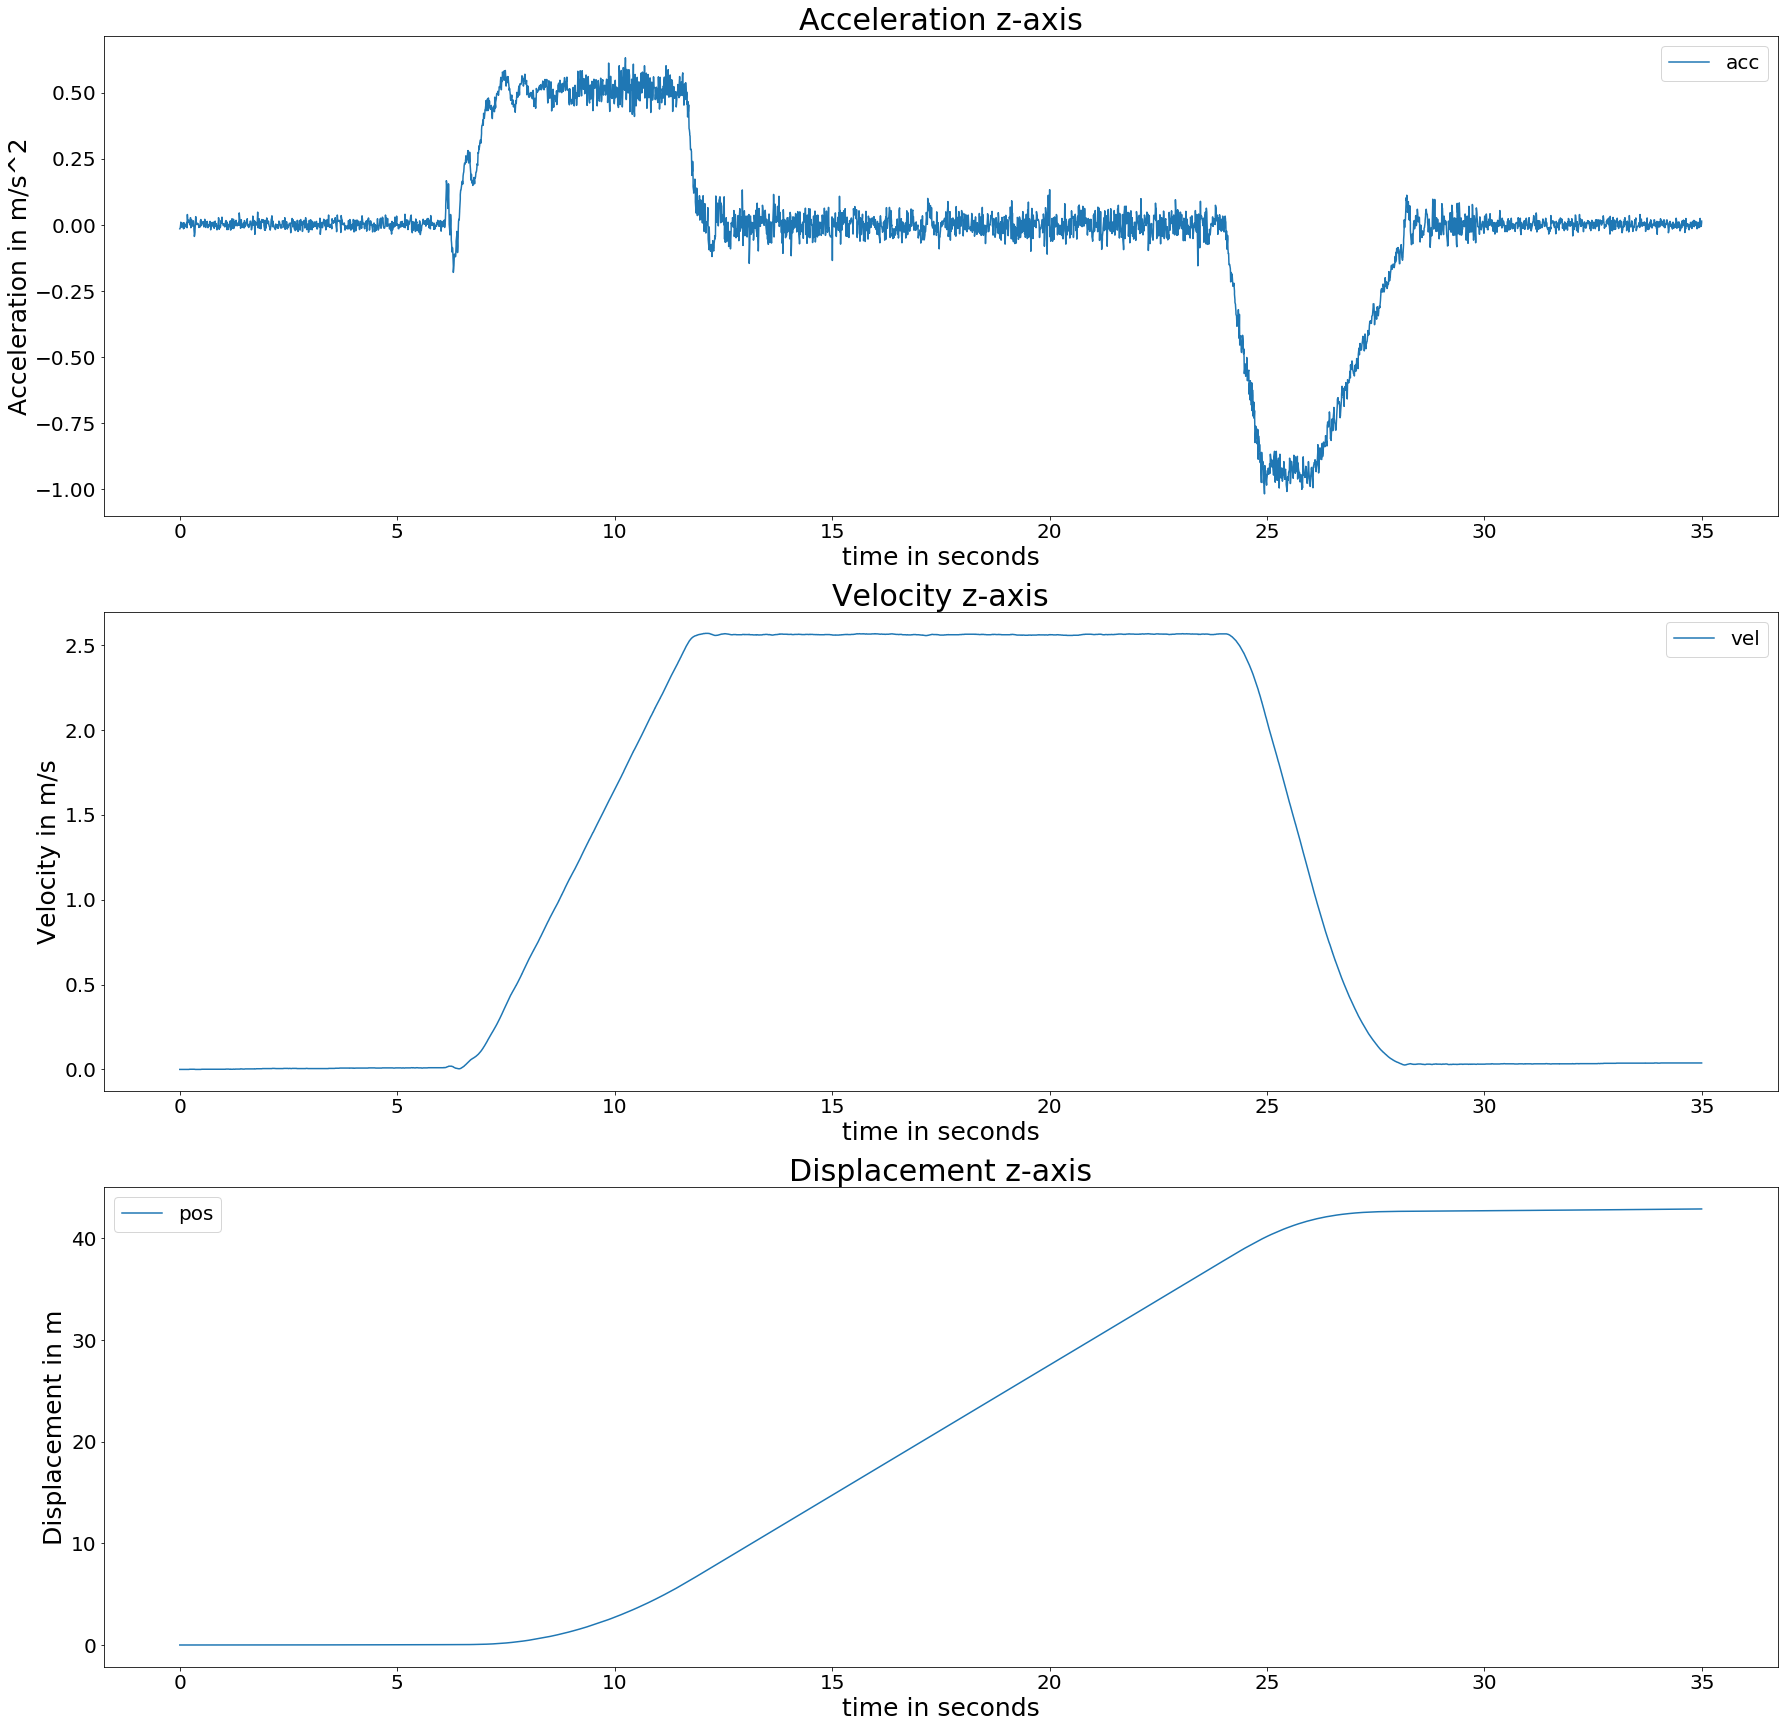

In [6]:
imu_data = data_6imu_1d_trans_single
print("Plots 5 runs for 6 IMUs using 1d transformation with single filter")
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data[run]
    plot_run_data(run_dict)

Plots 5 runs for 4 IMUs using 1d transformation with multiple filters
Run 1


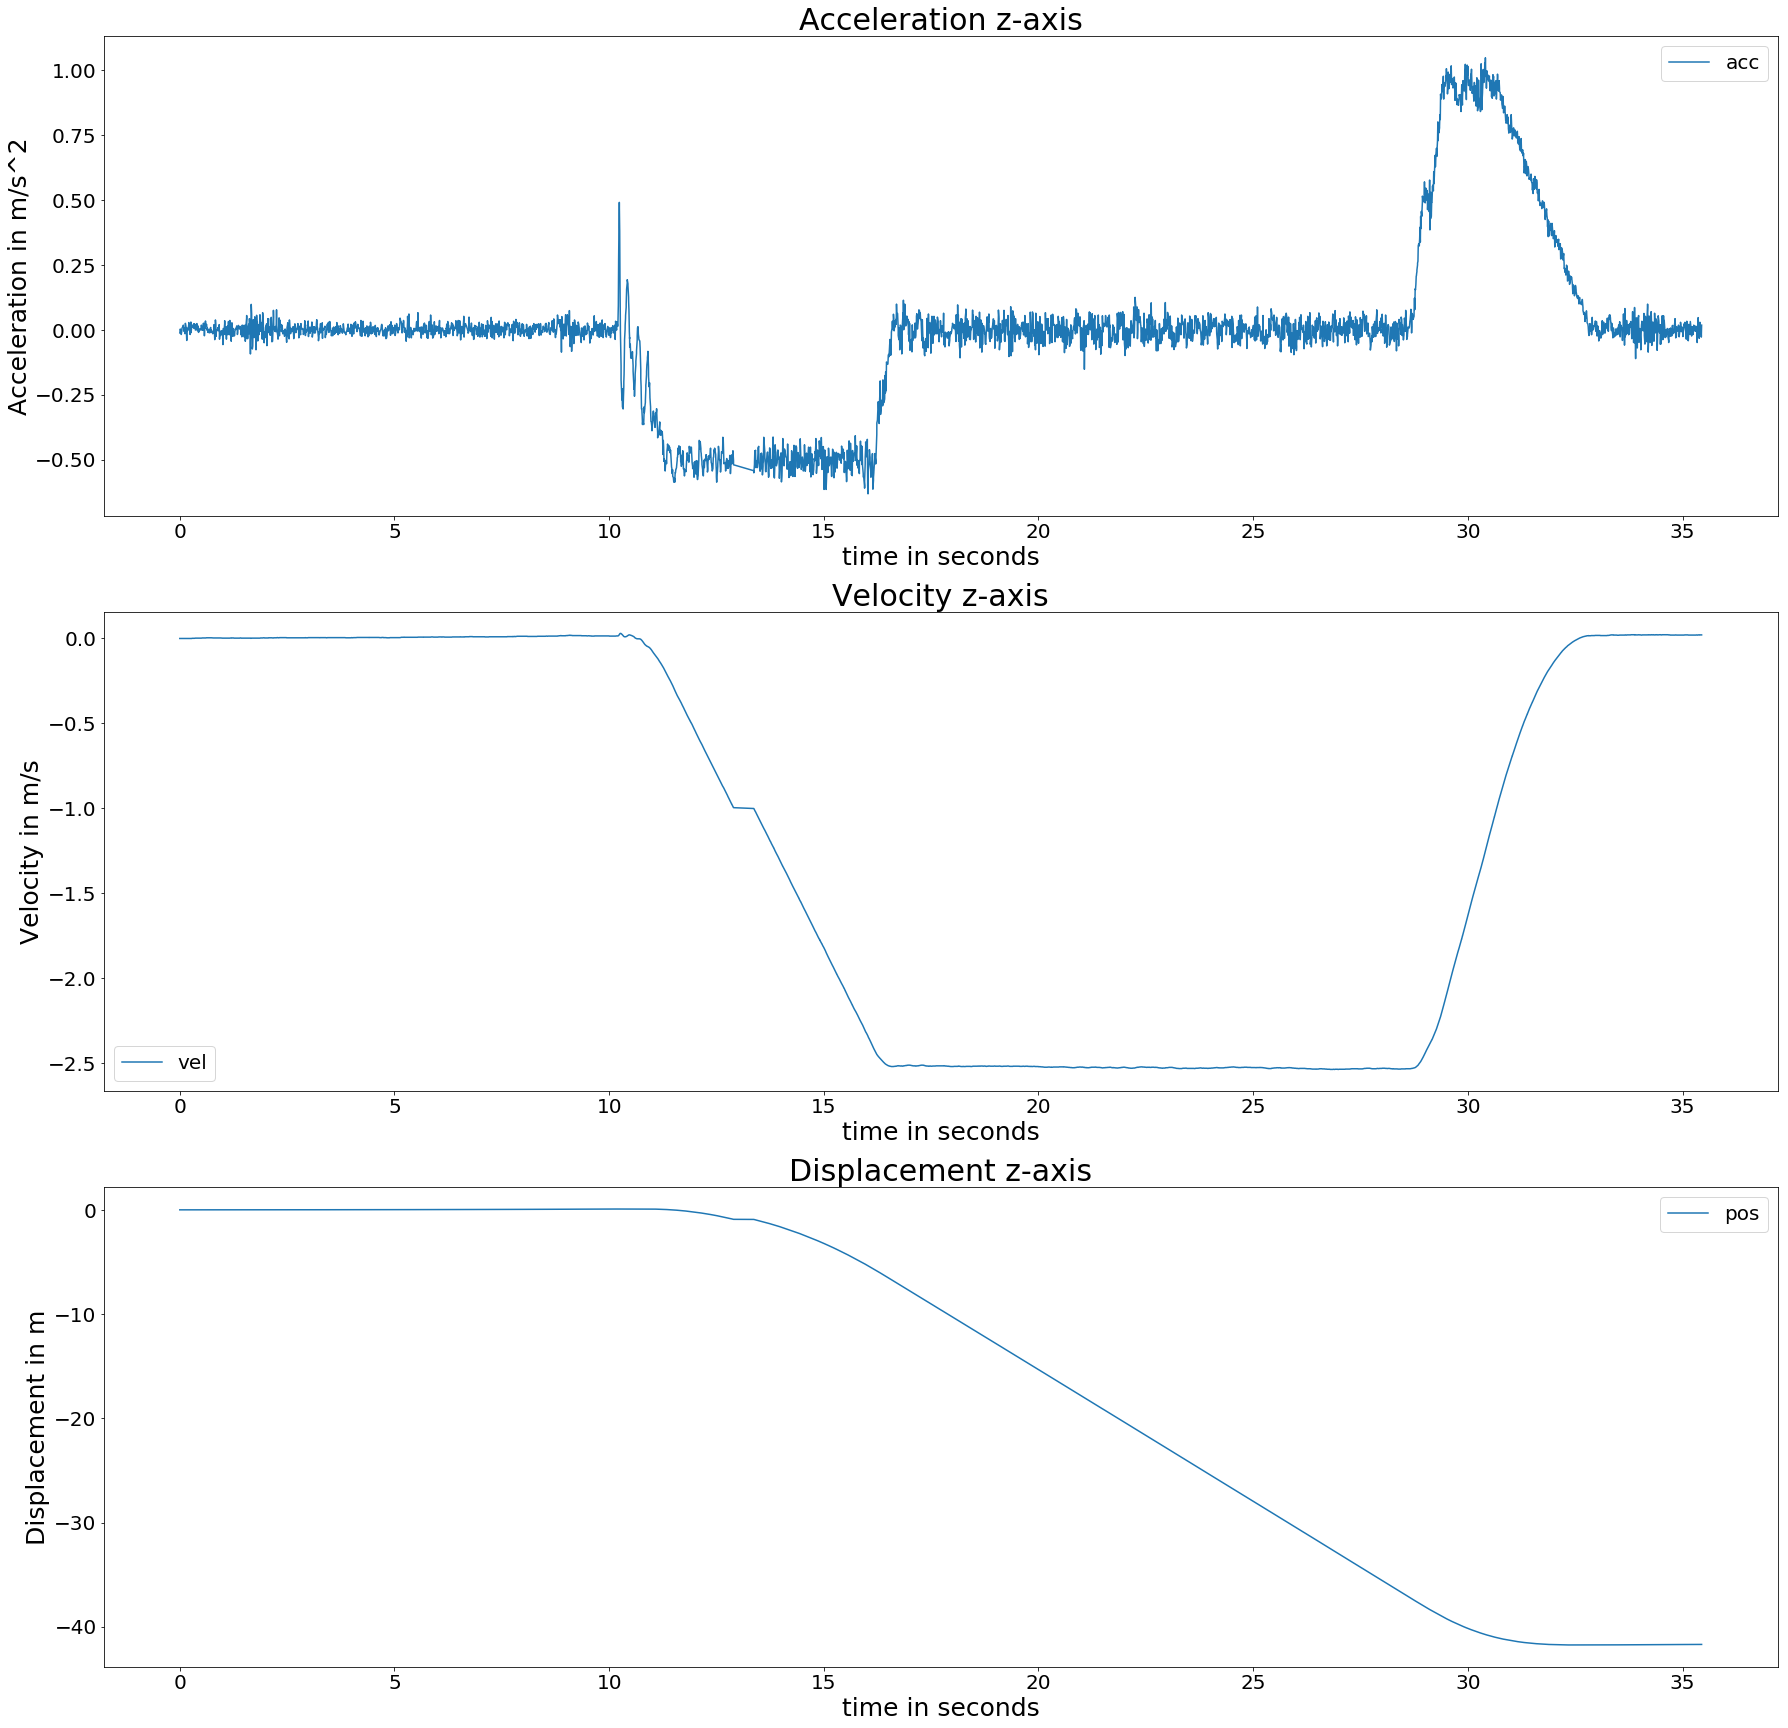

Run 2


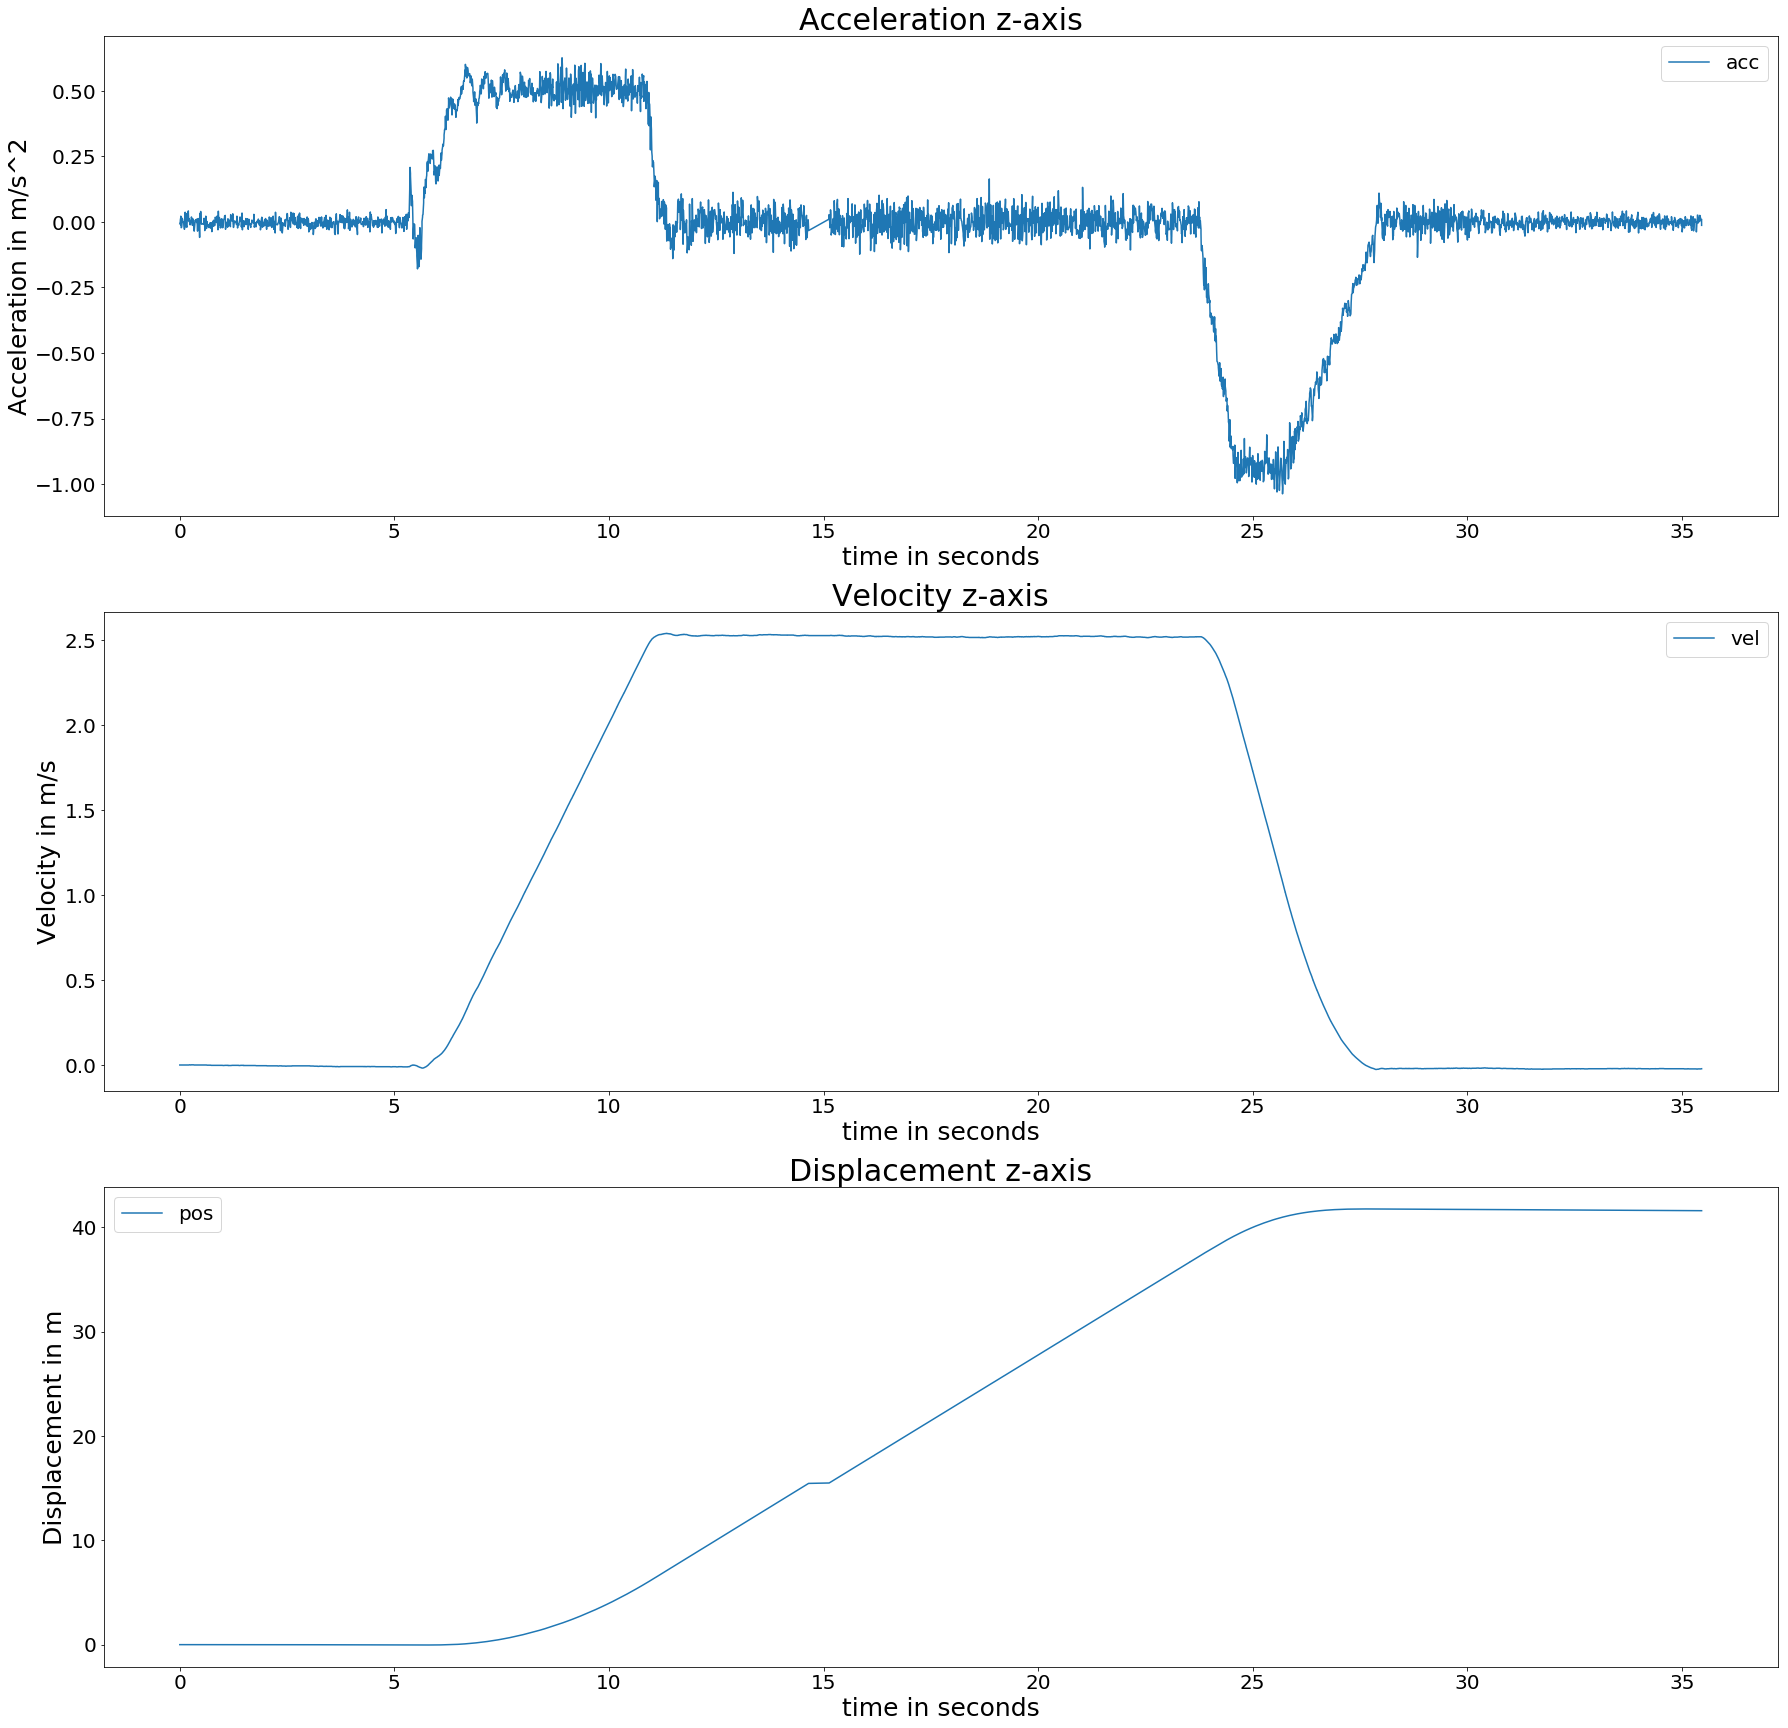

Run 3


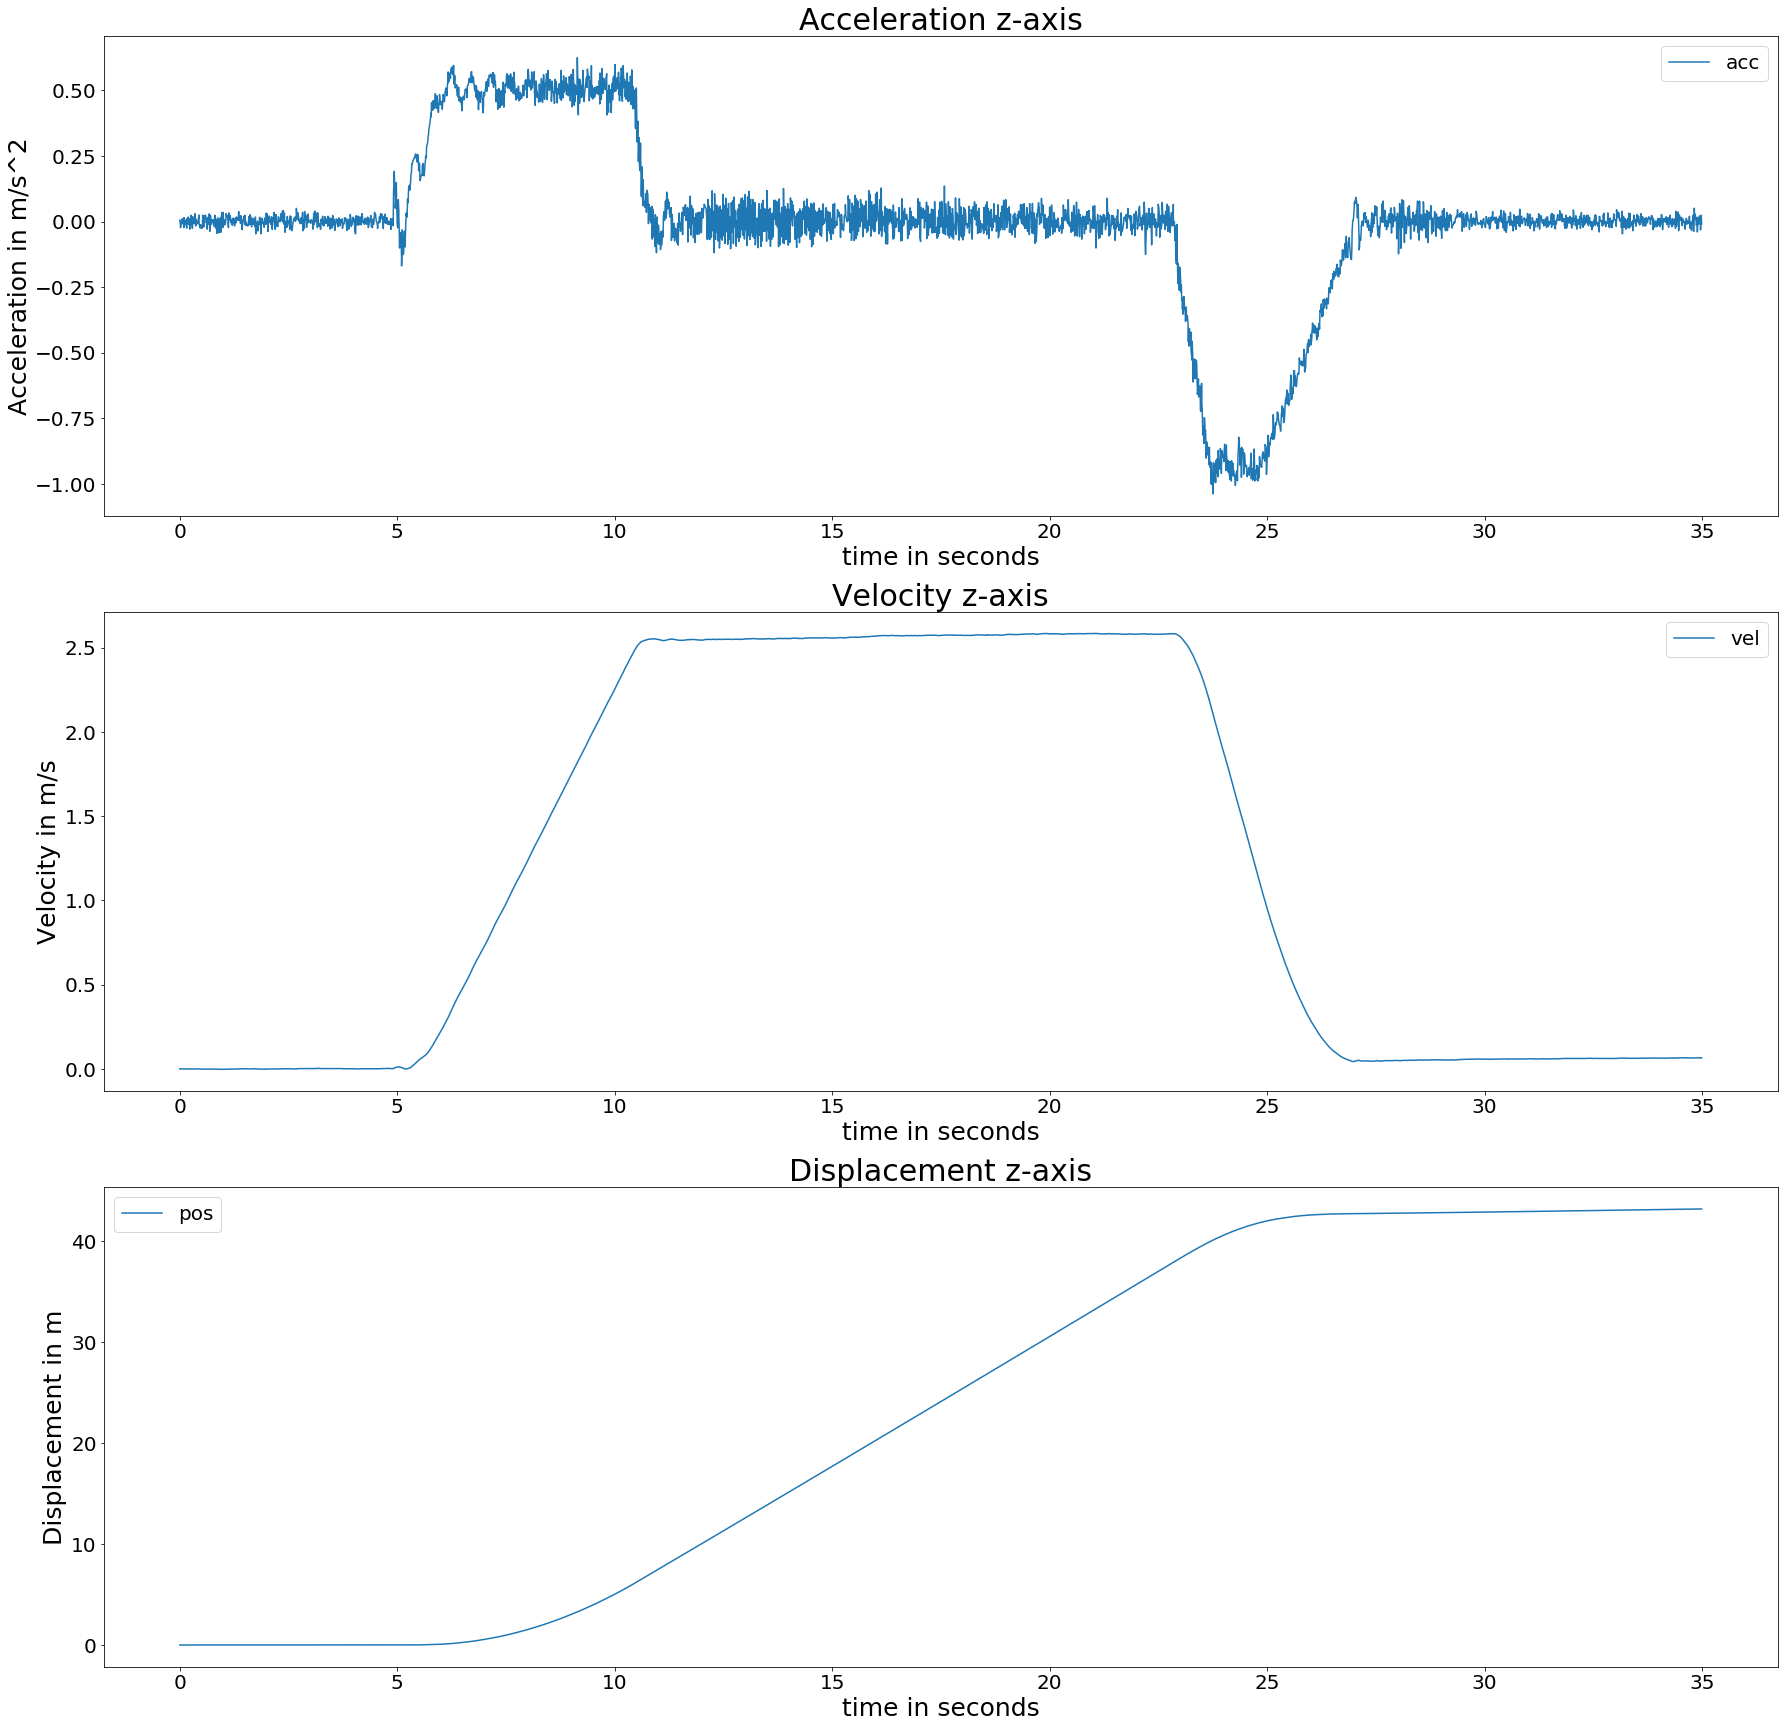

Run 4


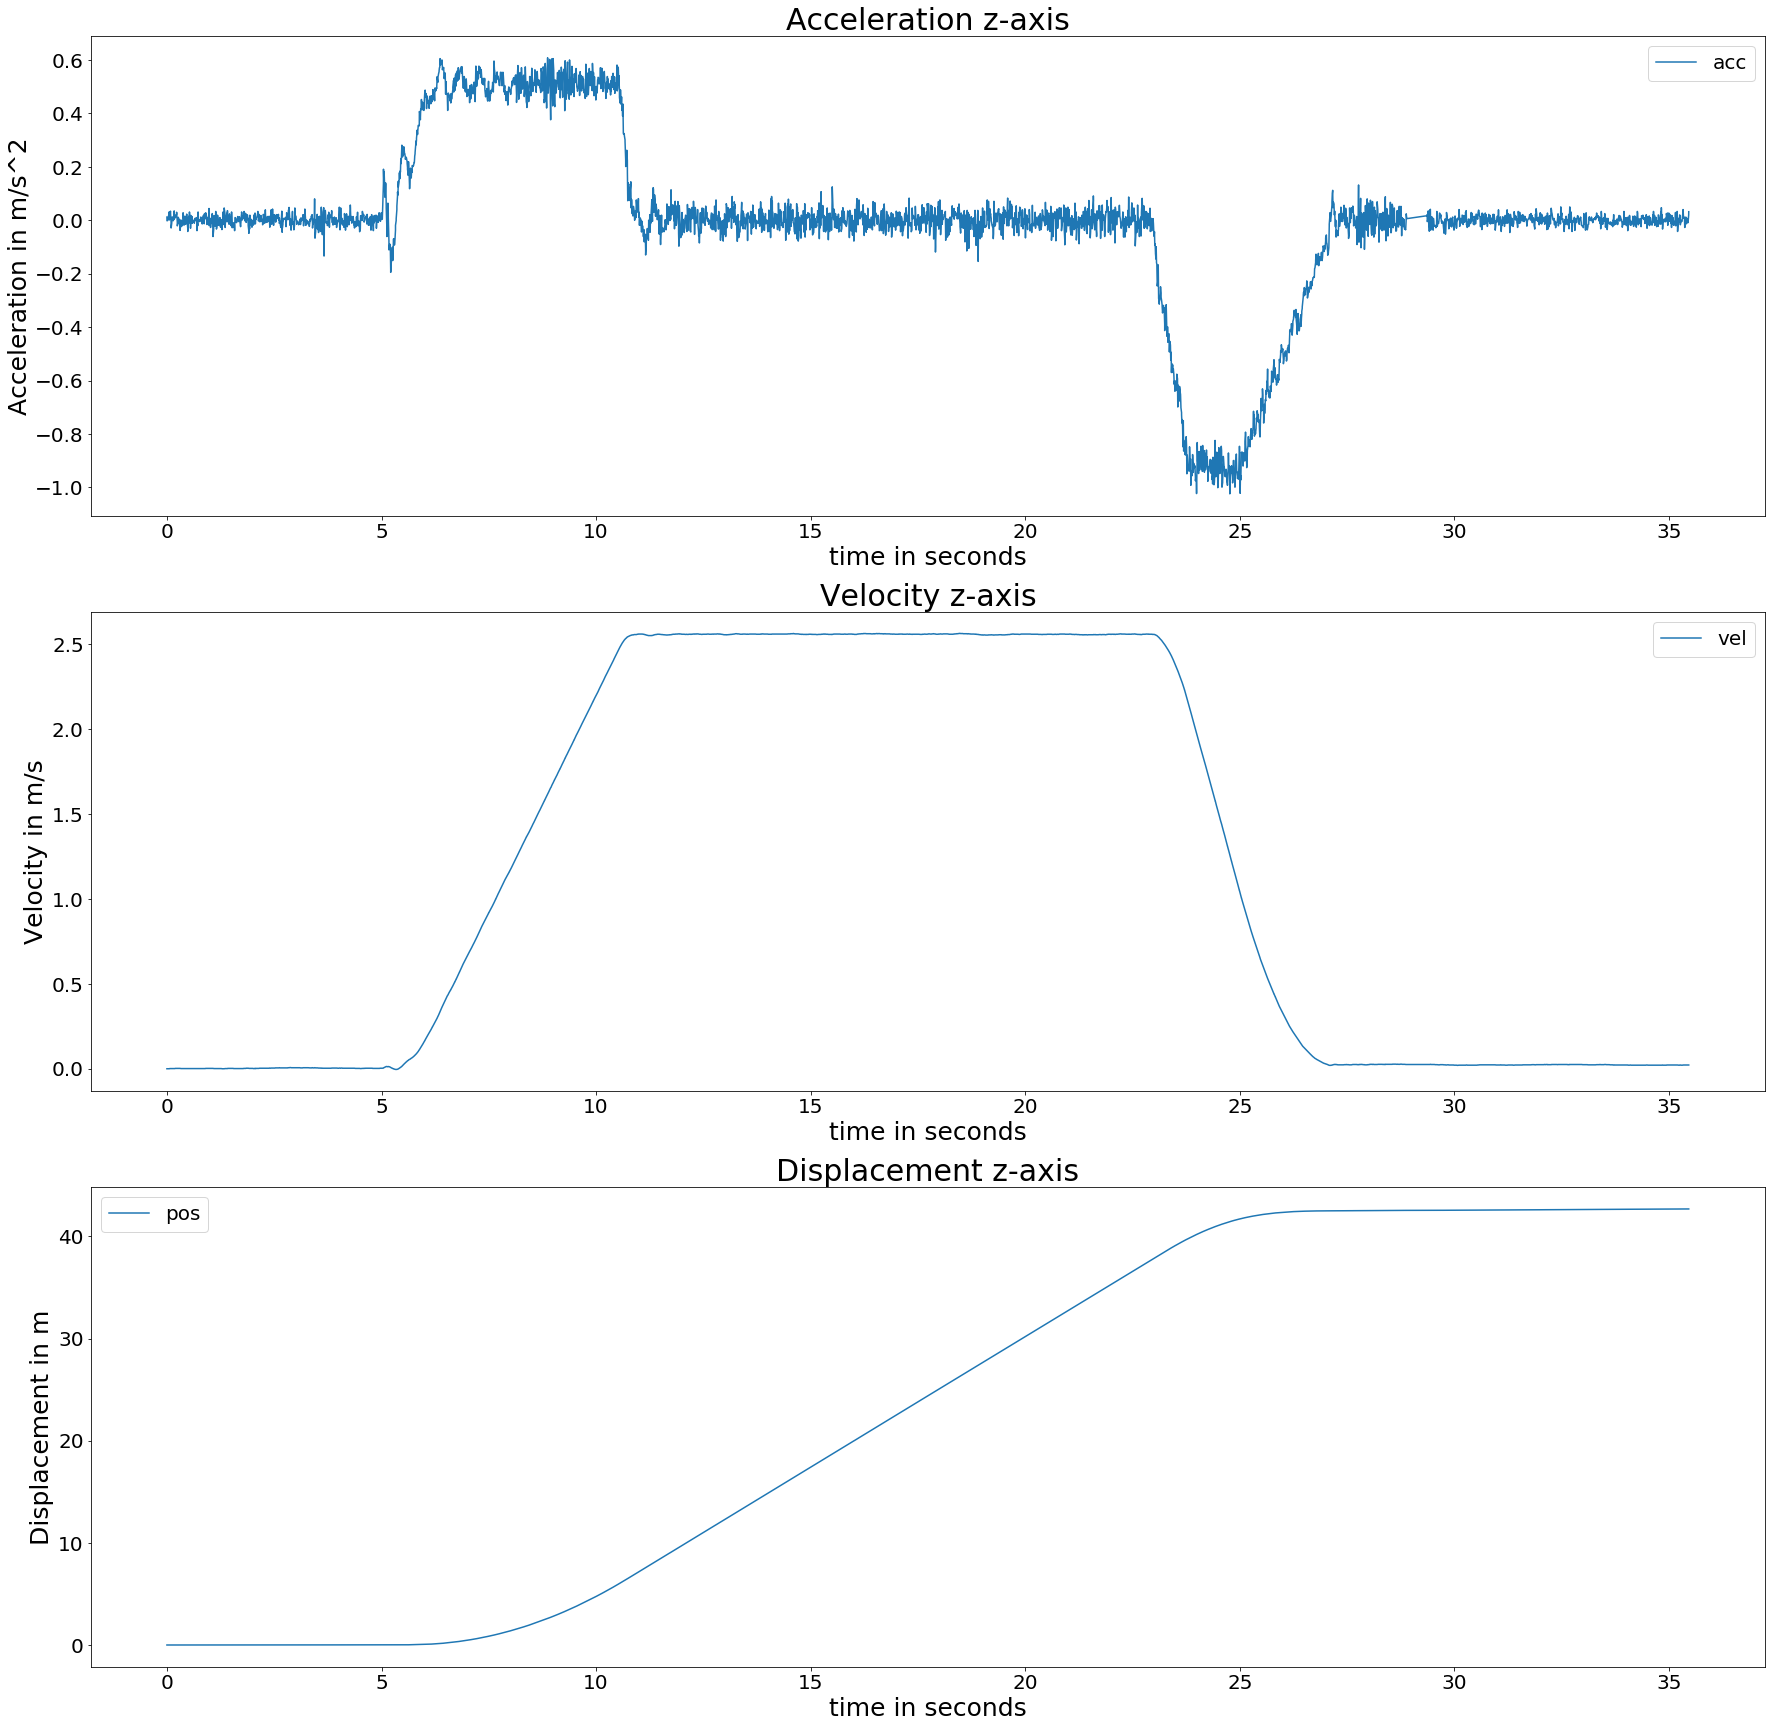

Run 5


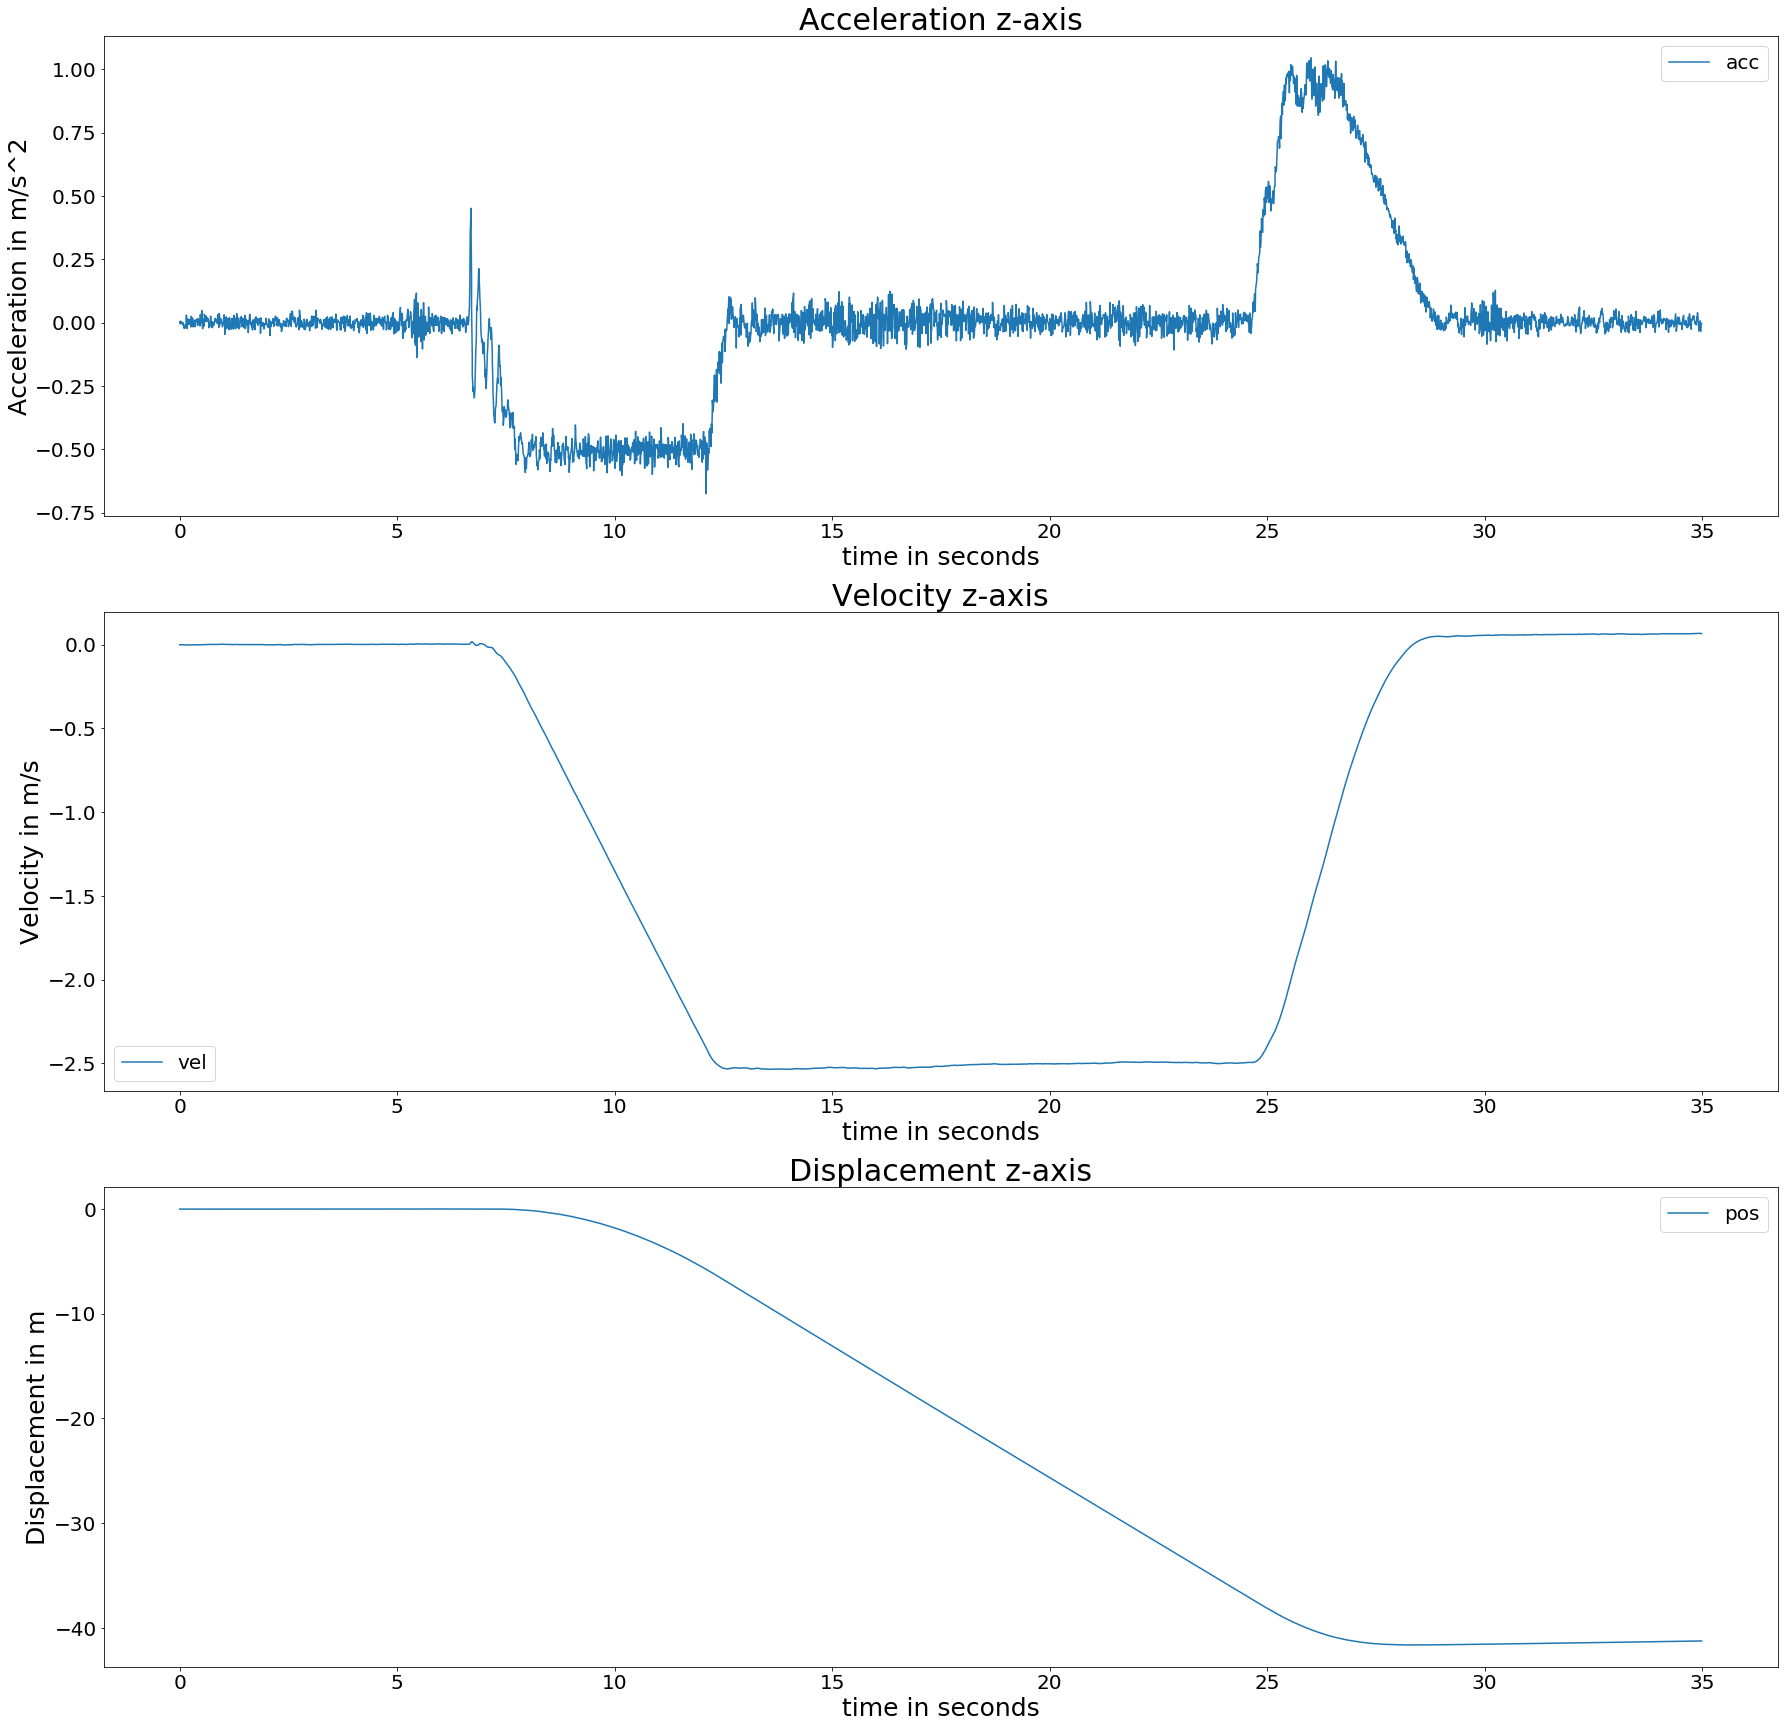

In [7]:
imu_data = data_4imu_1d_trans_multi
print("Plots 5 runs for 4 IMUs using 1d transformation with multiple filters")
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data[run]
    plot_run_data(run_dict)

Plots 5 runs for 6 IMUs using 1d transformation with multiple filters
Run 1


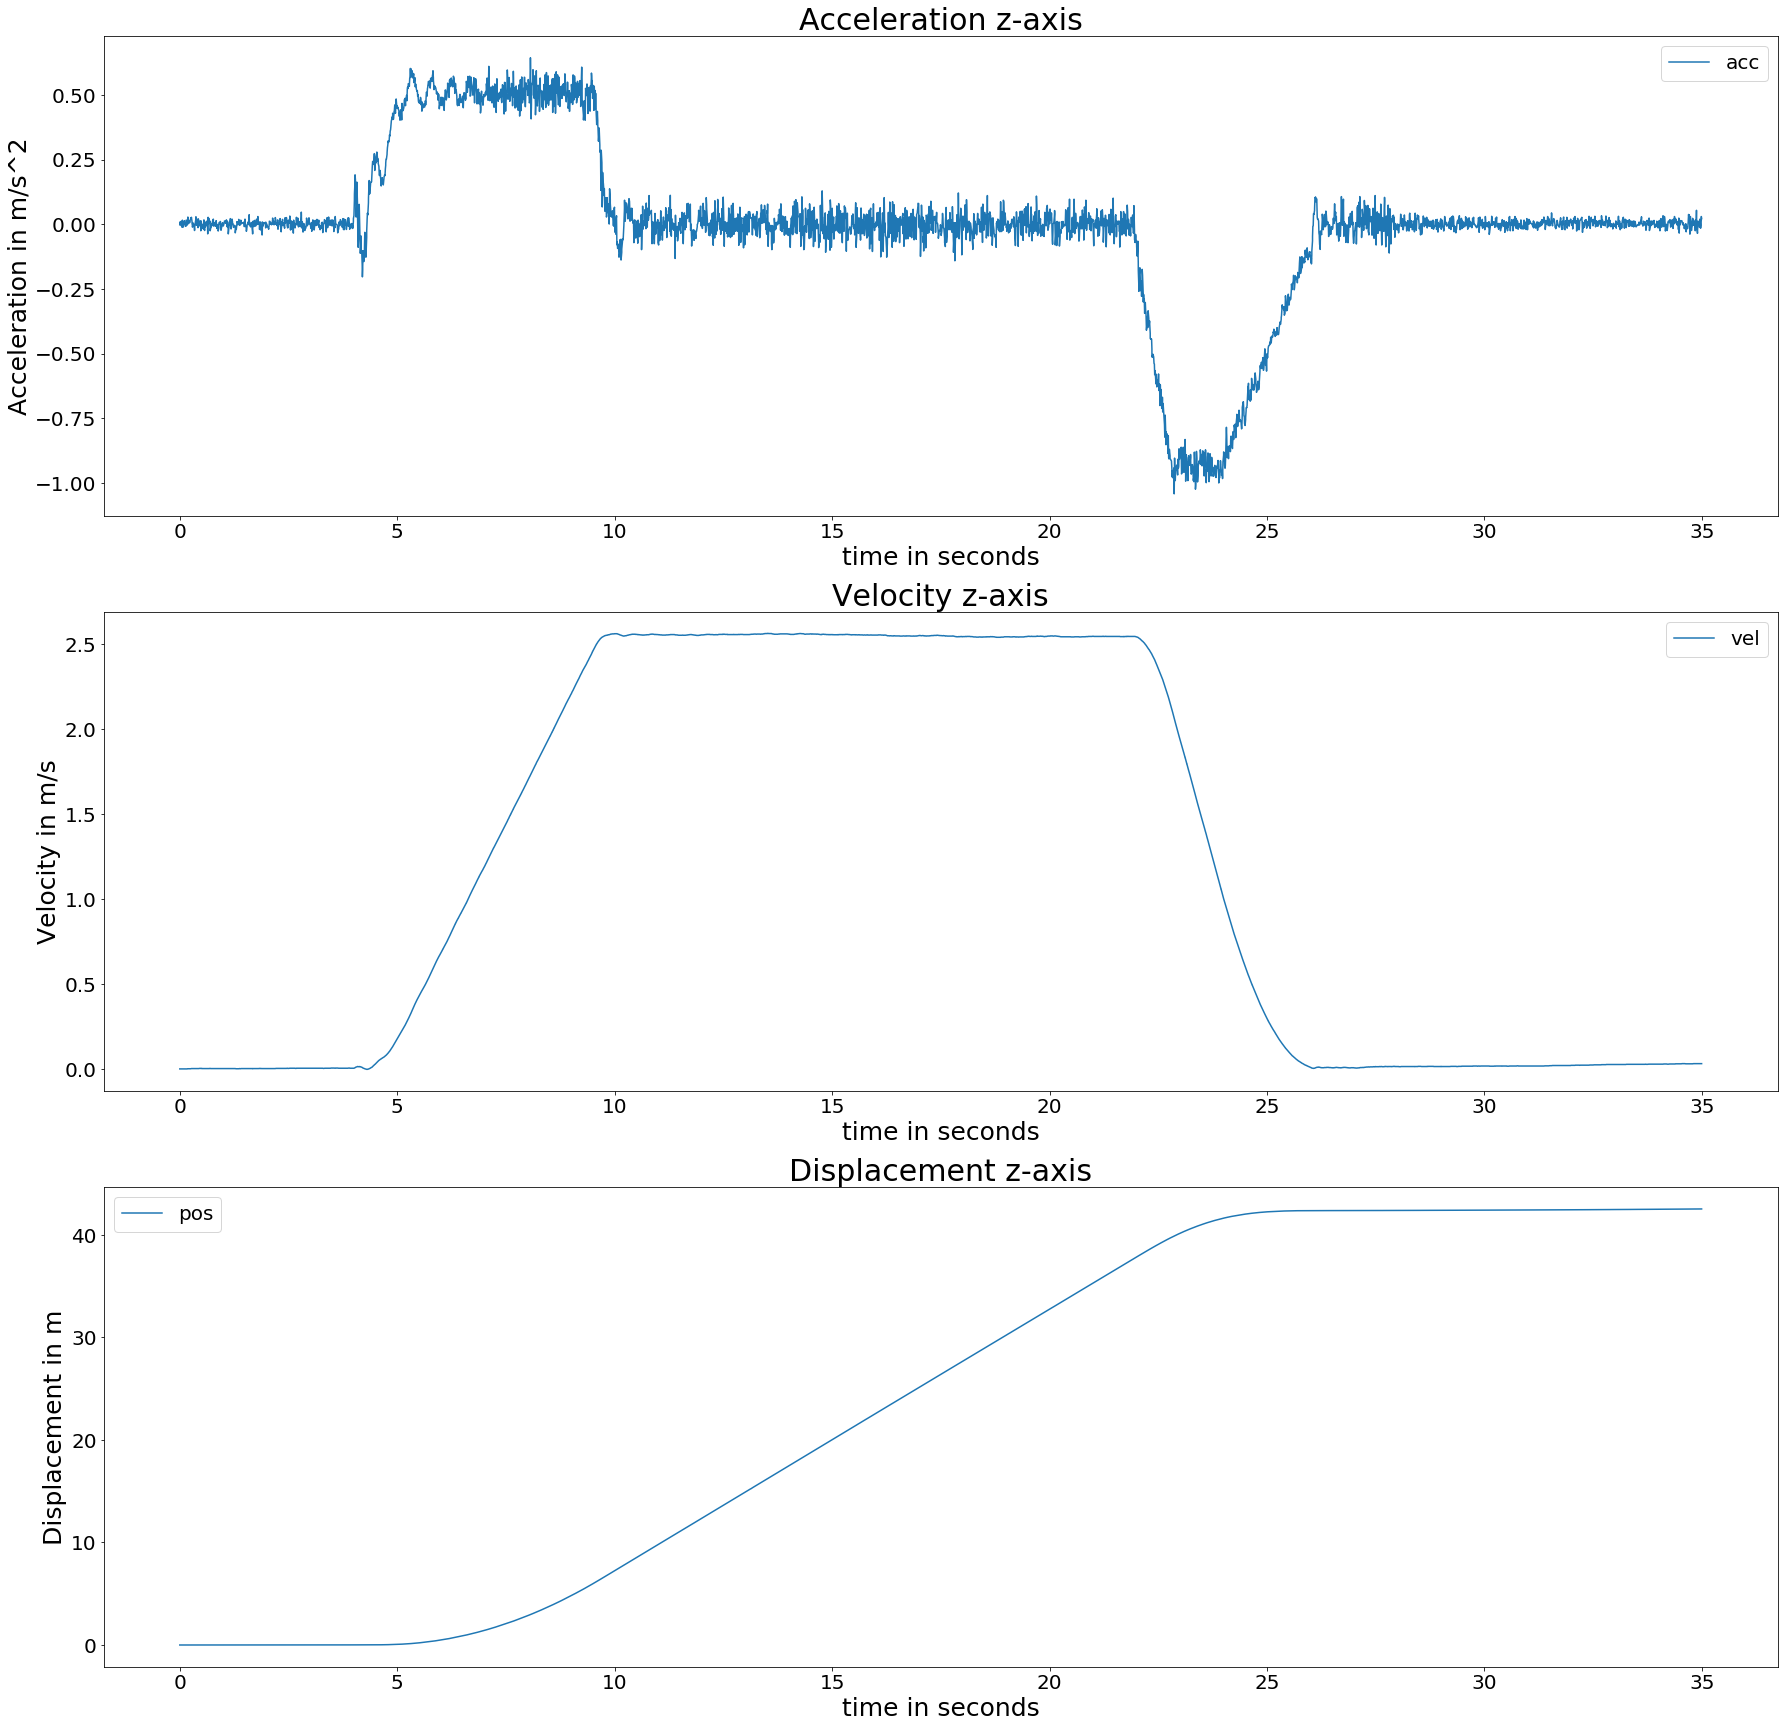

Run 2


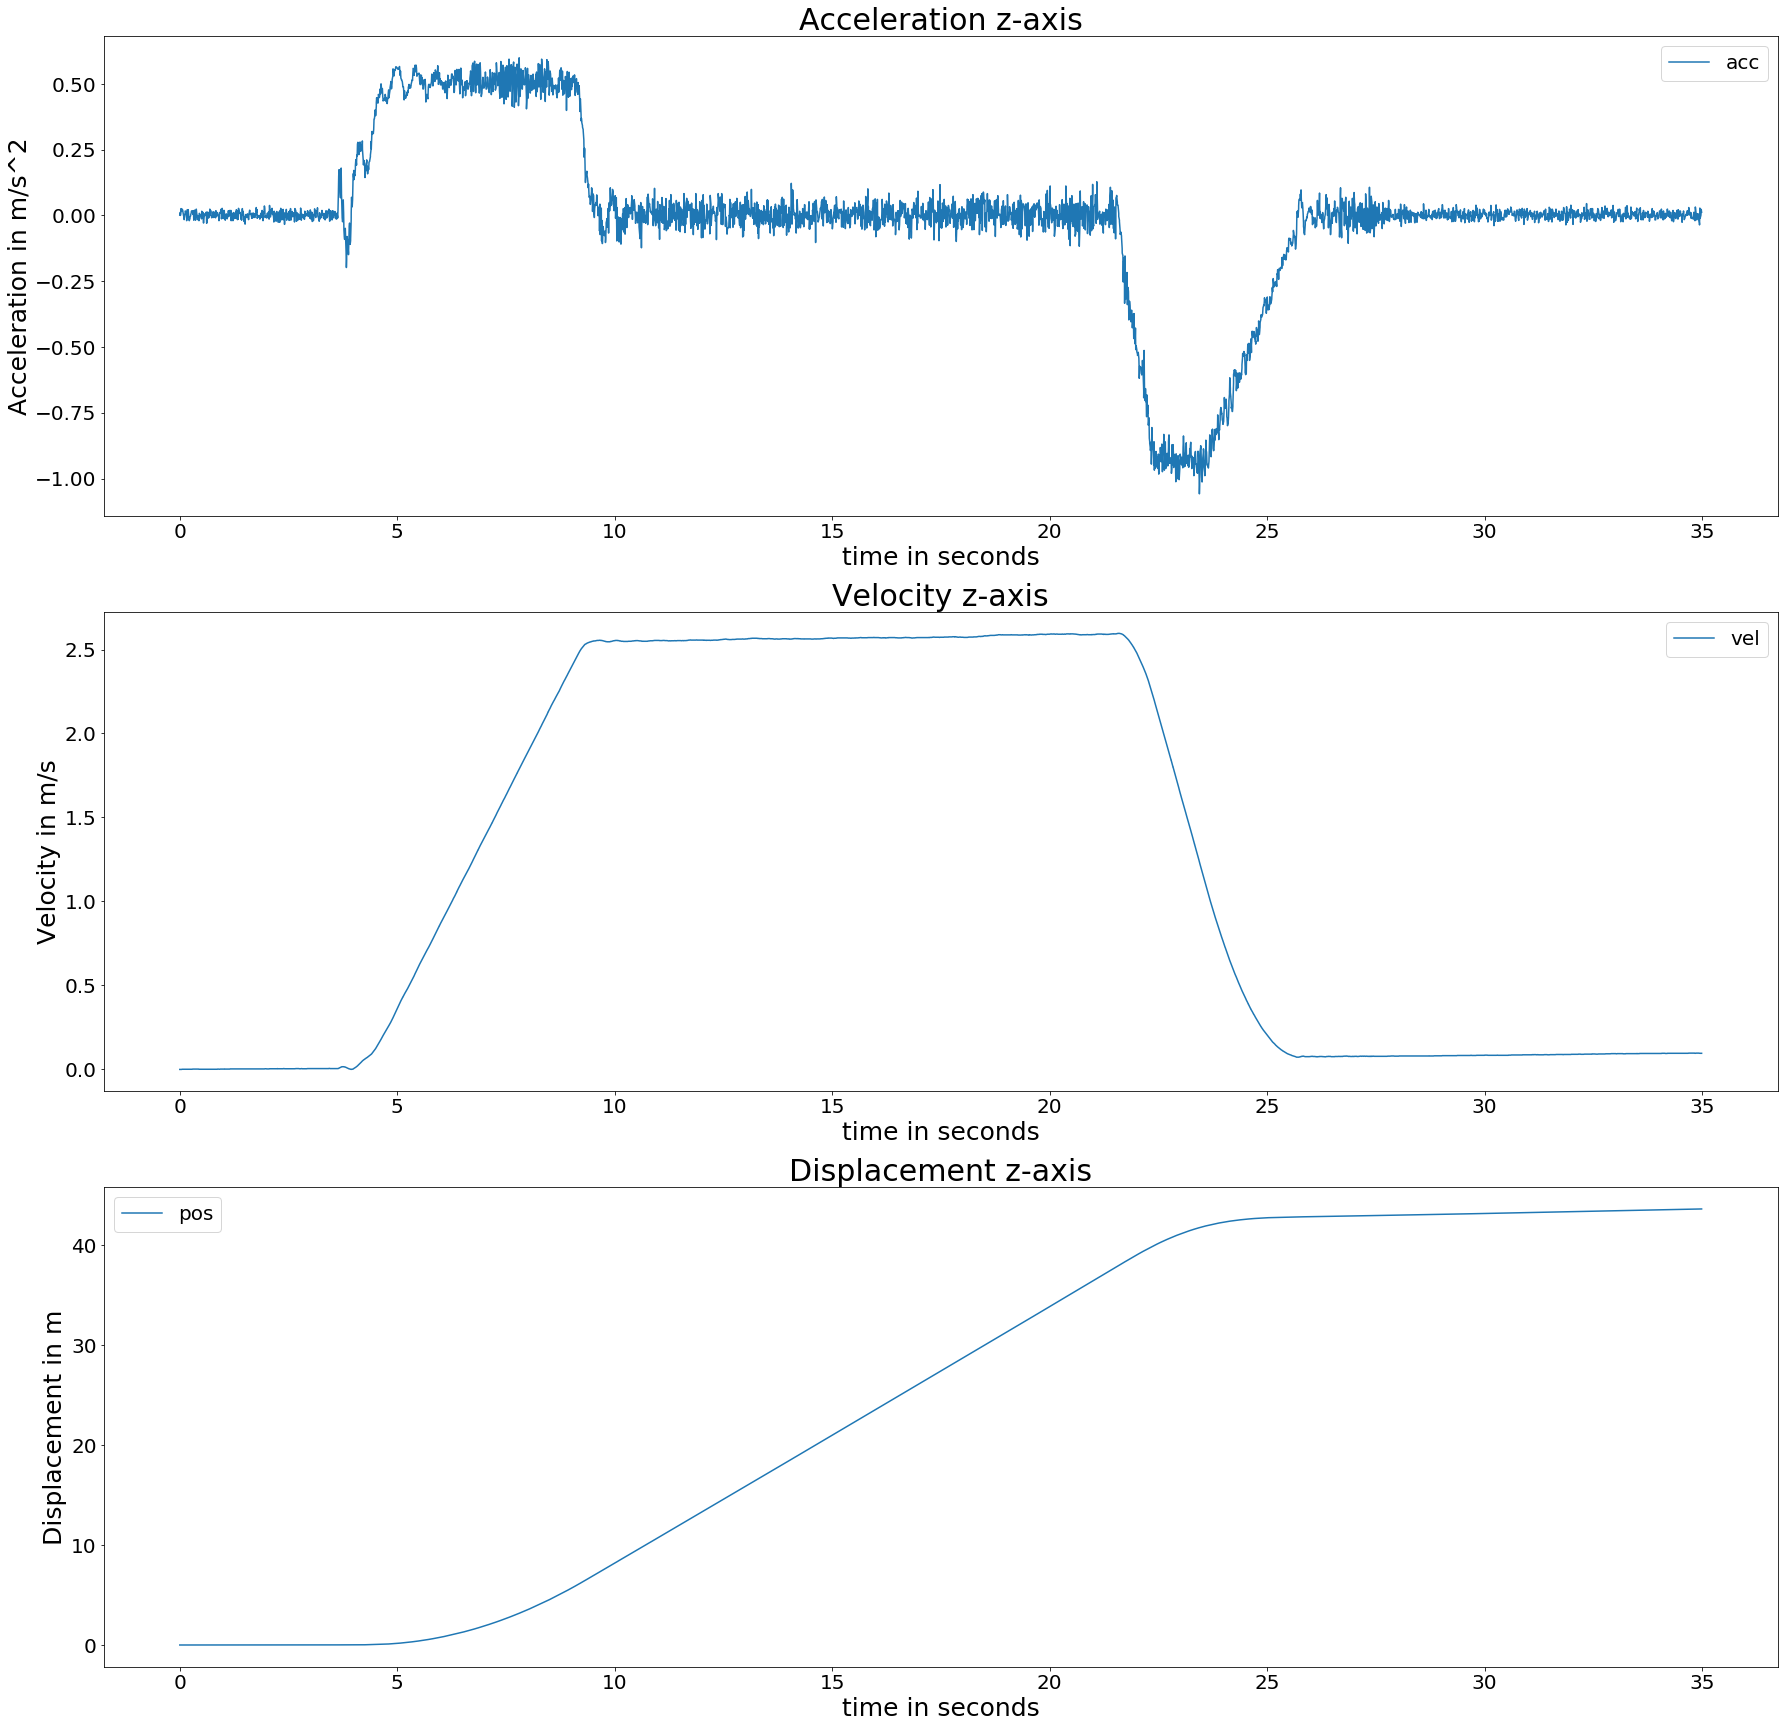

Run 3


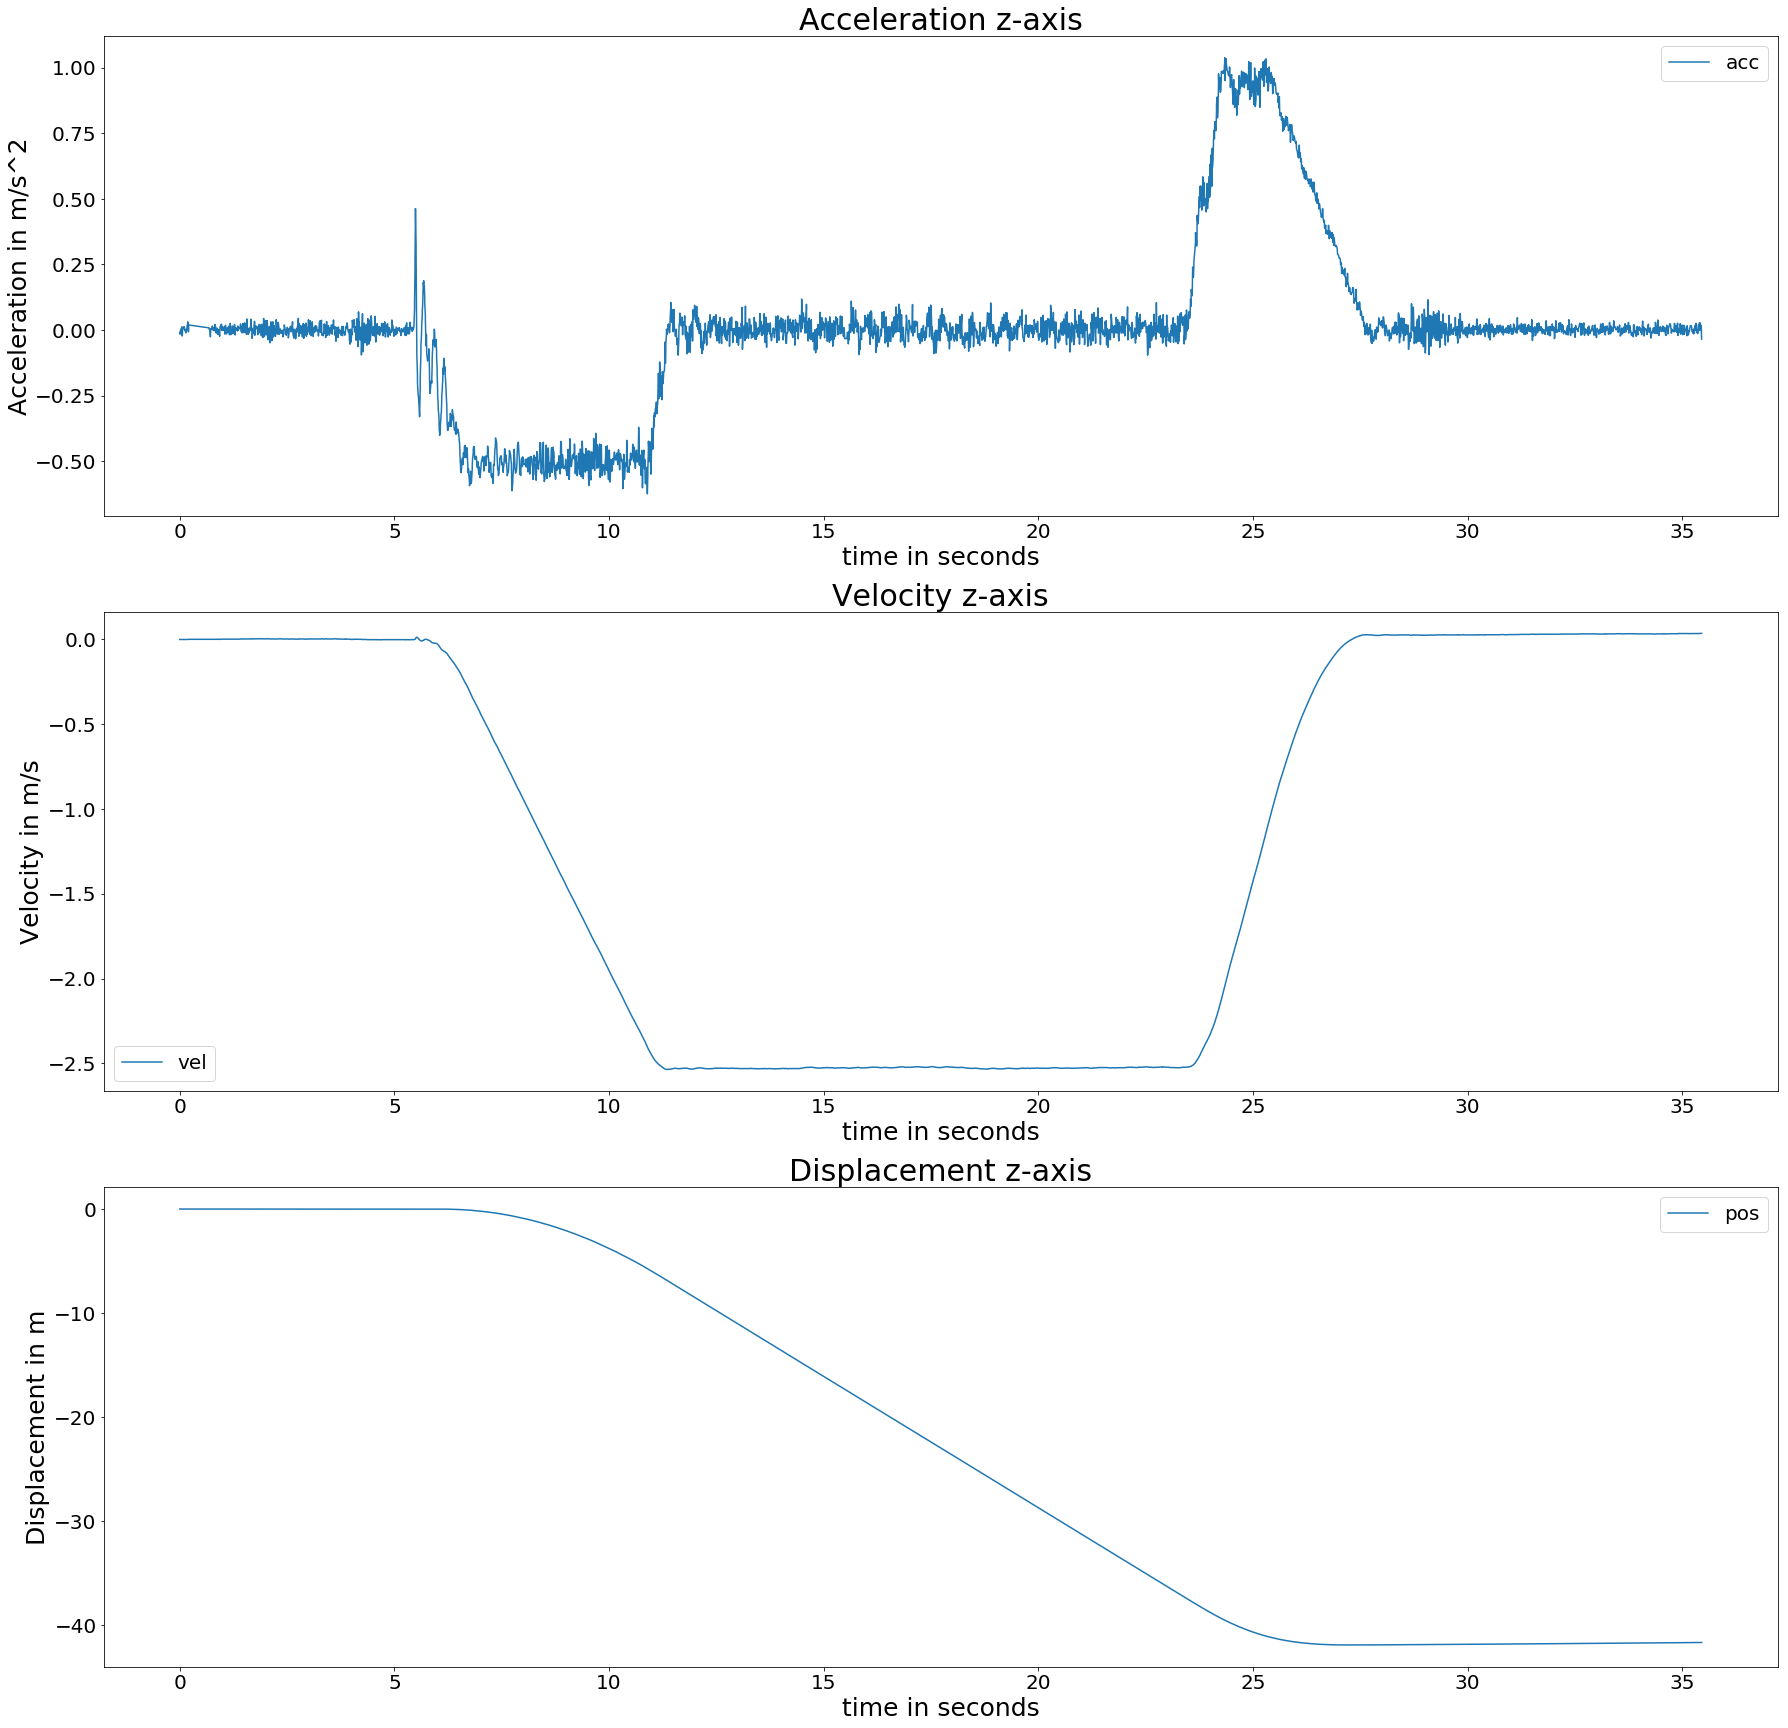

Run 4


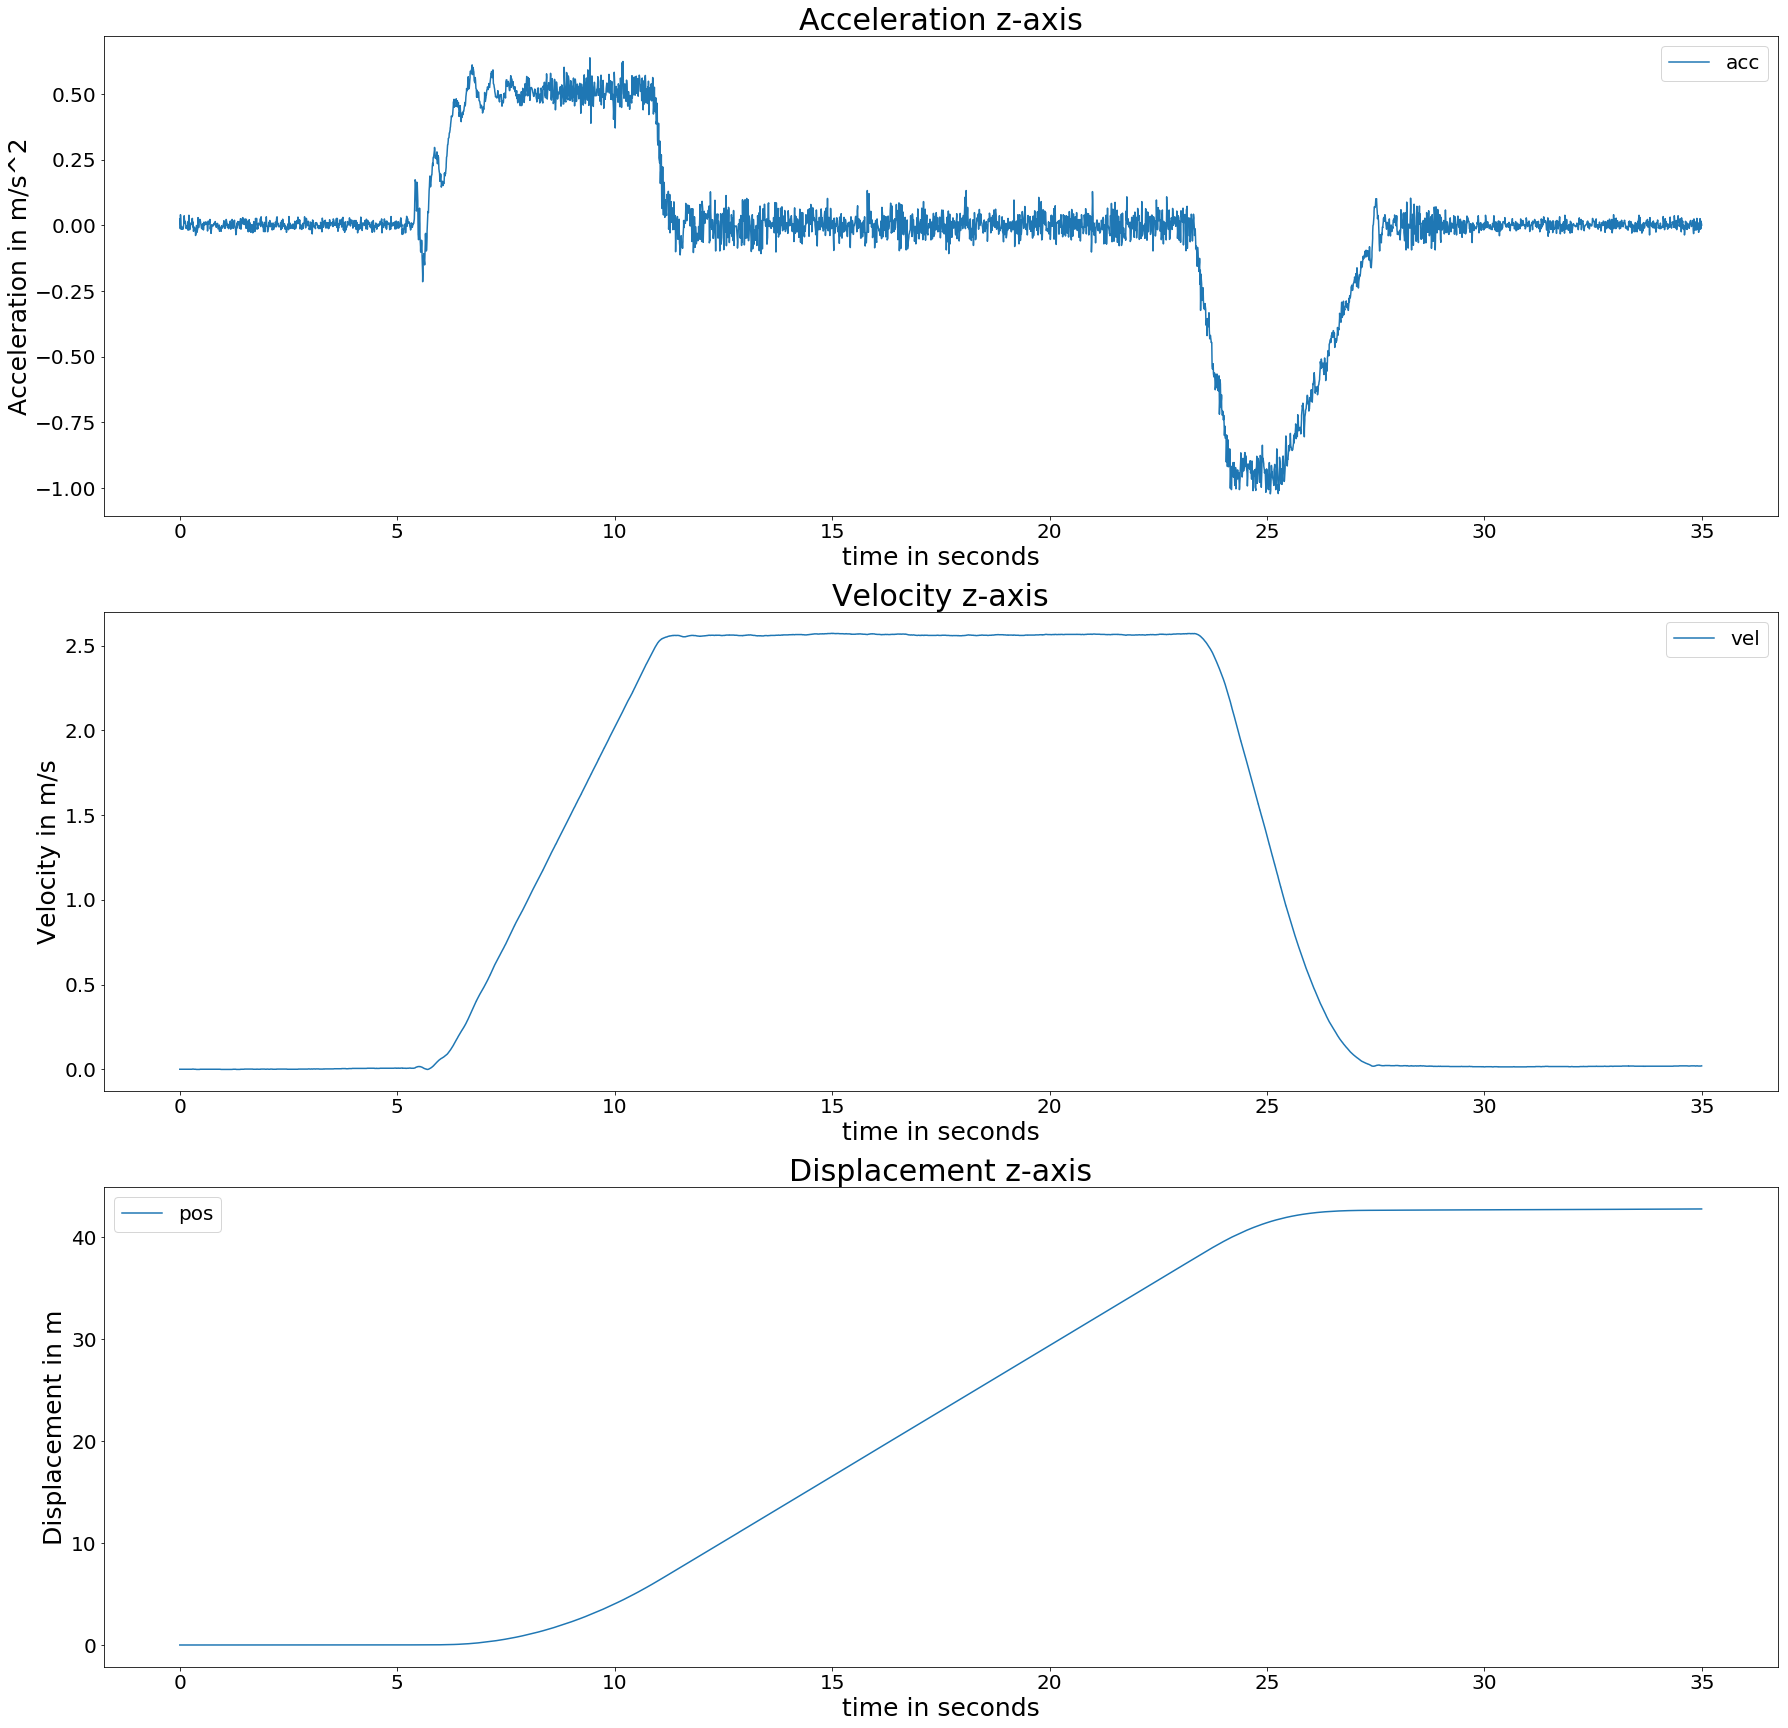

Run 5


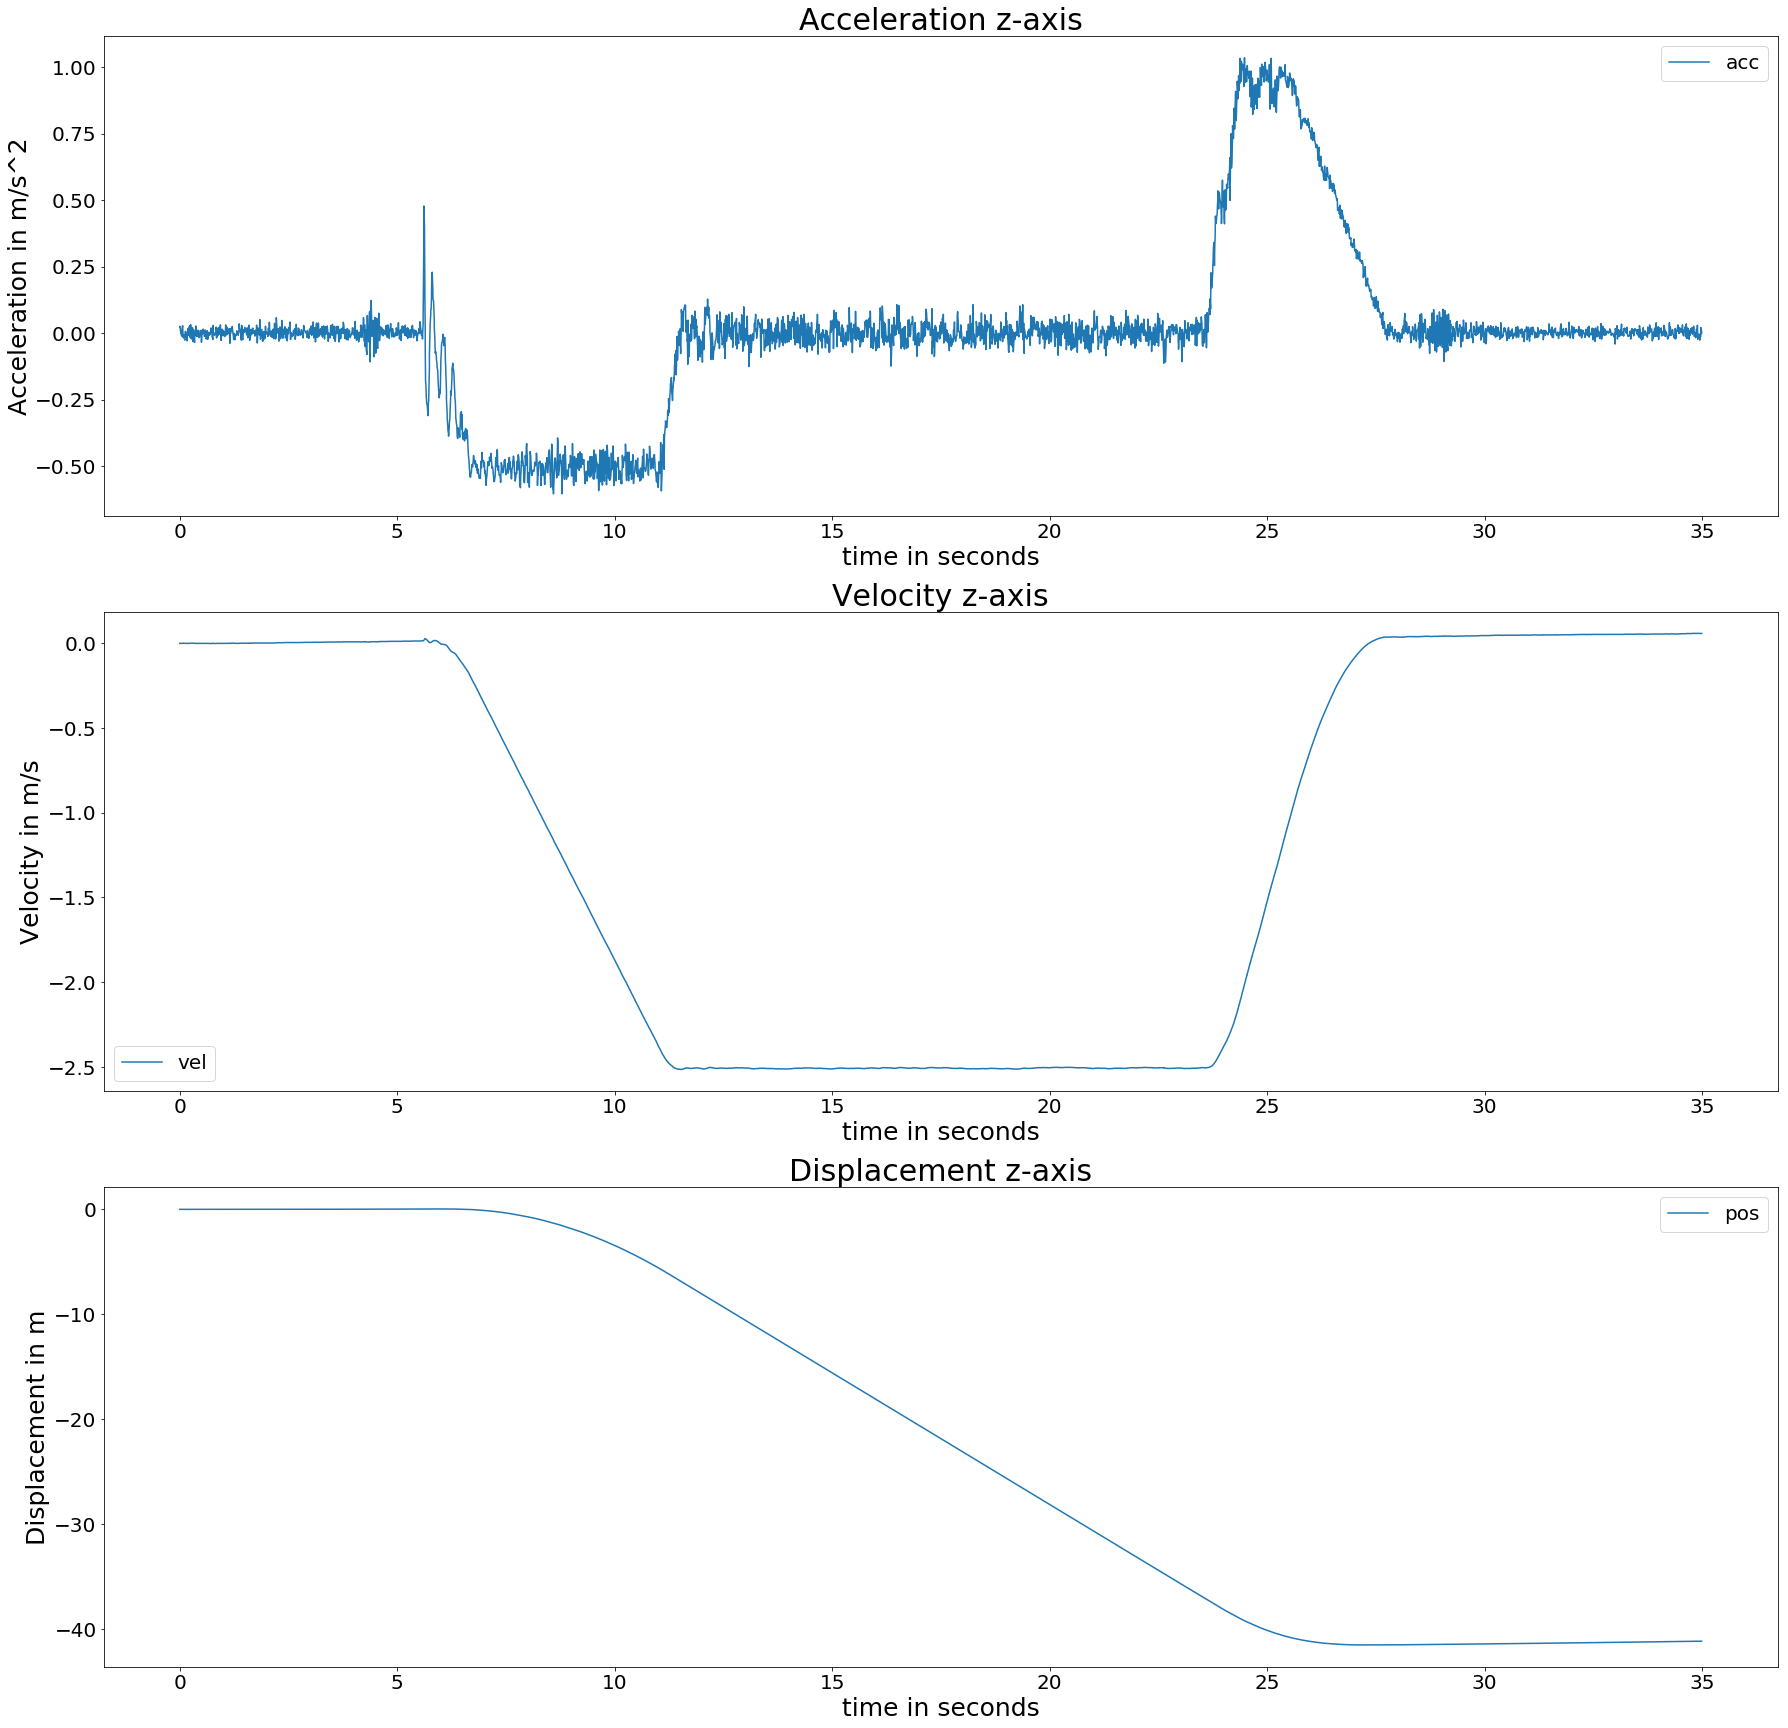

In [8]:
imu_data = data_6imu_1d_trans_multi
print("Plots 5 runs for 6 IMUs using 1d transformation with multiple filters")
for run in range(5):
    print("Run %d" % (run + 1))
    run_dict = imu_data[run]
    plot_run_data(run_dict)

Plots 4 runs for 6 IMUs using 1d transformation with multiple filters
Run 1


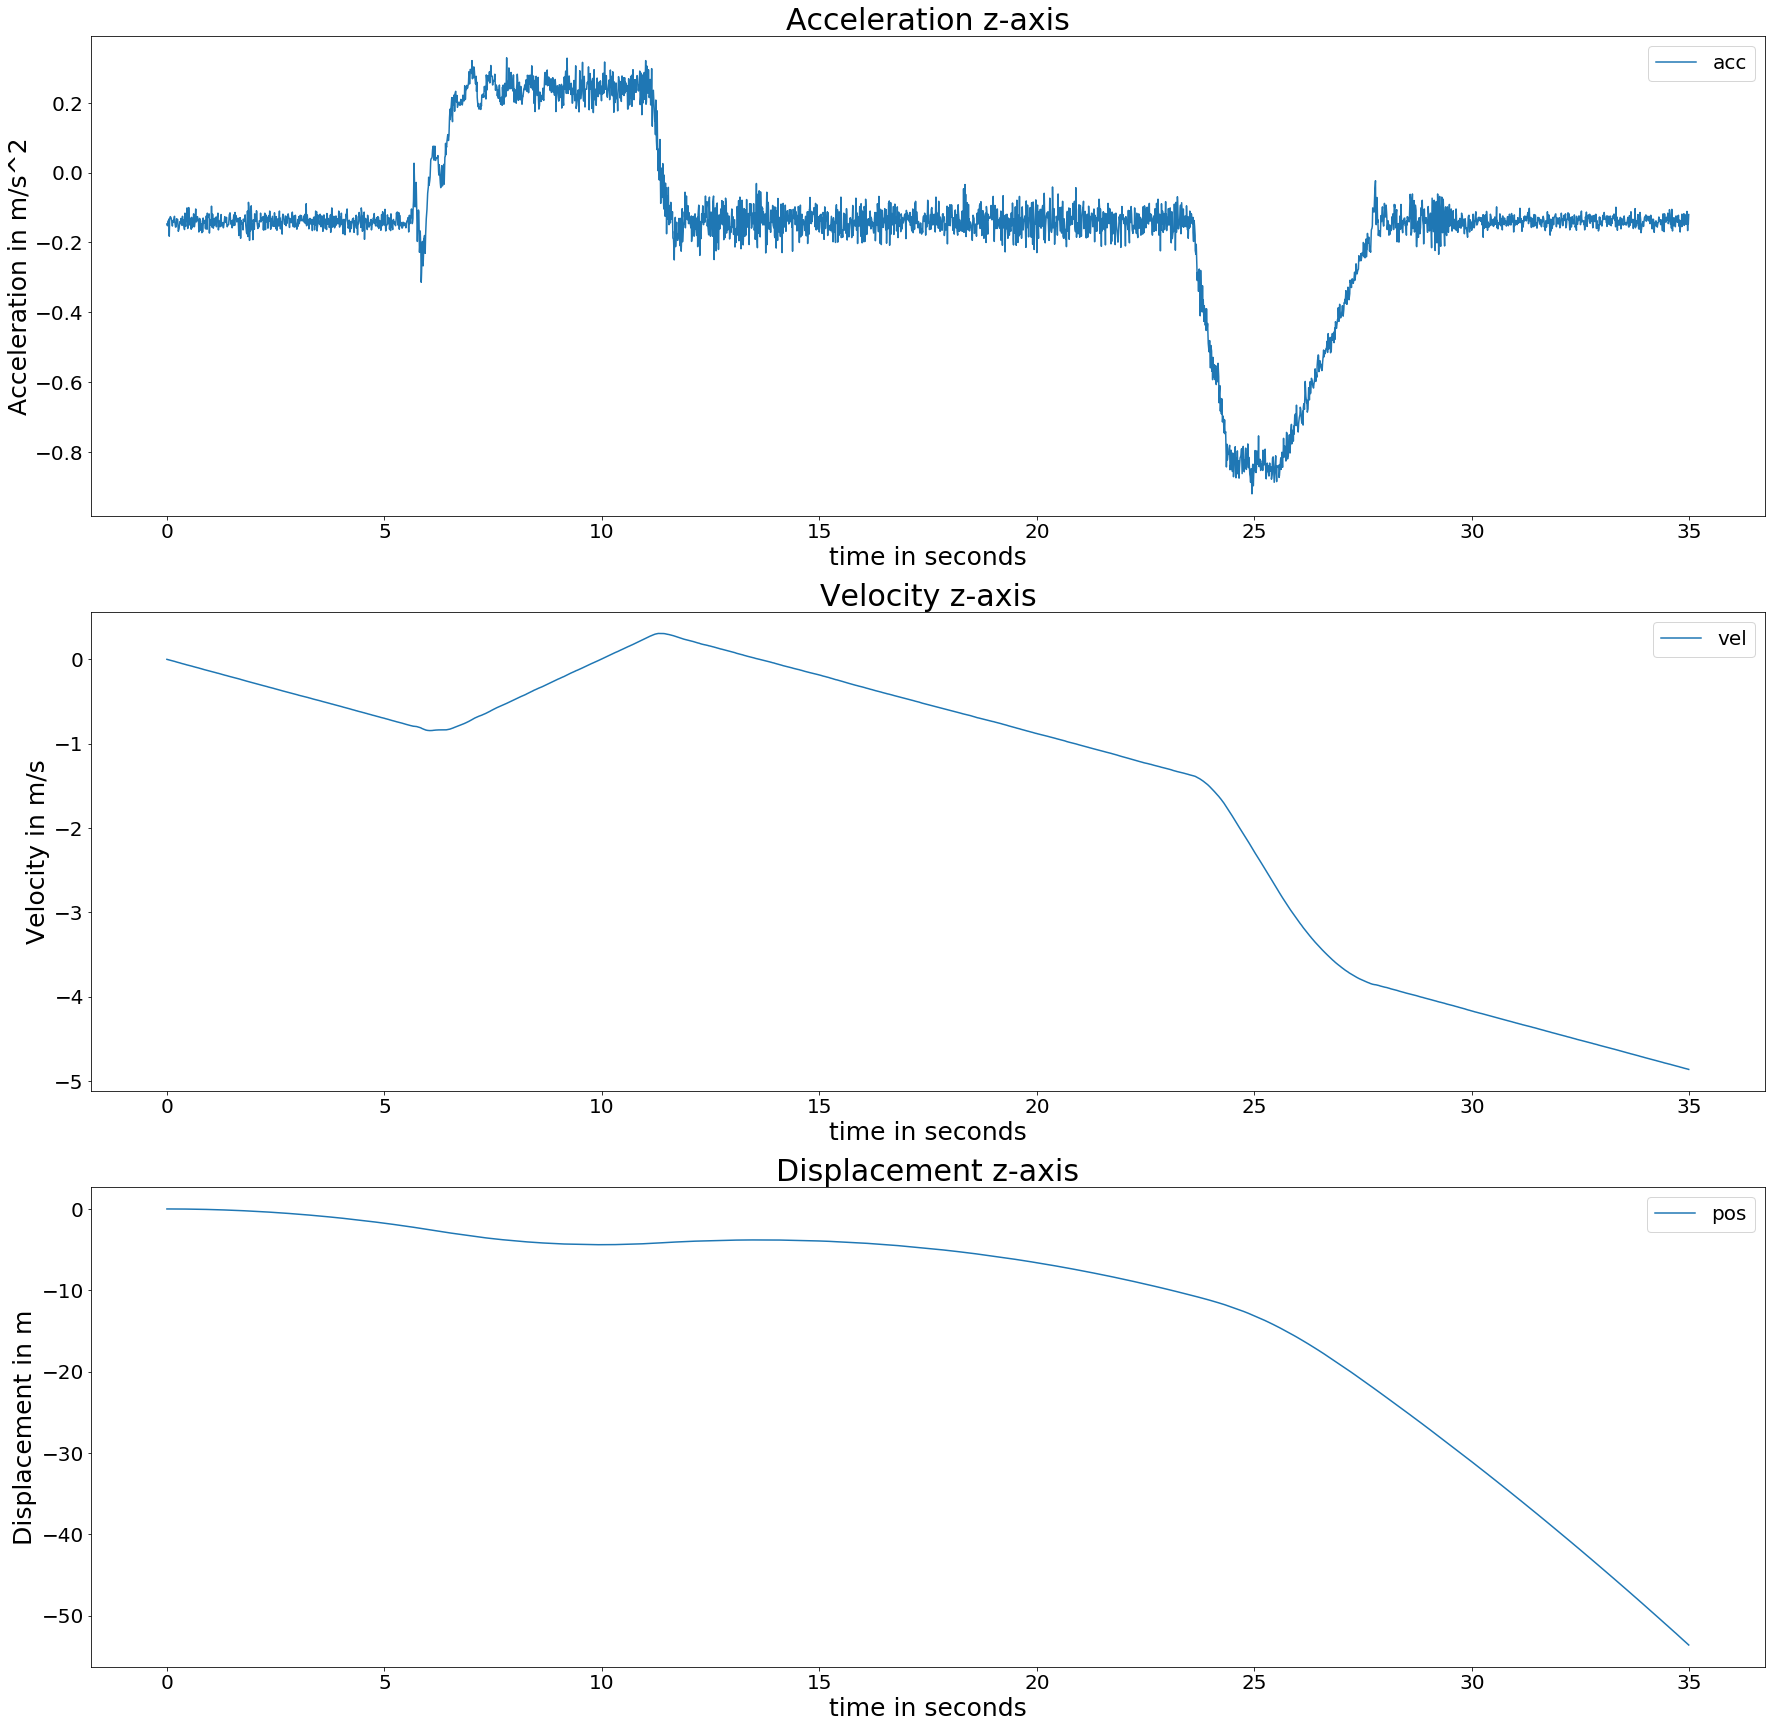

Run 2


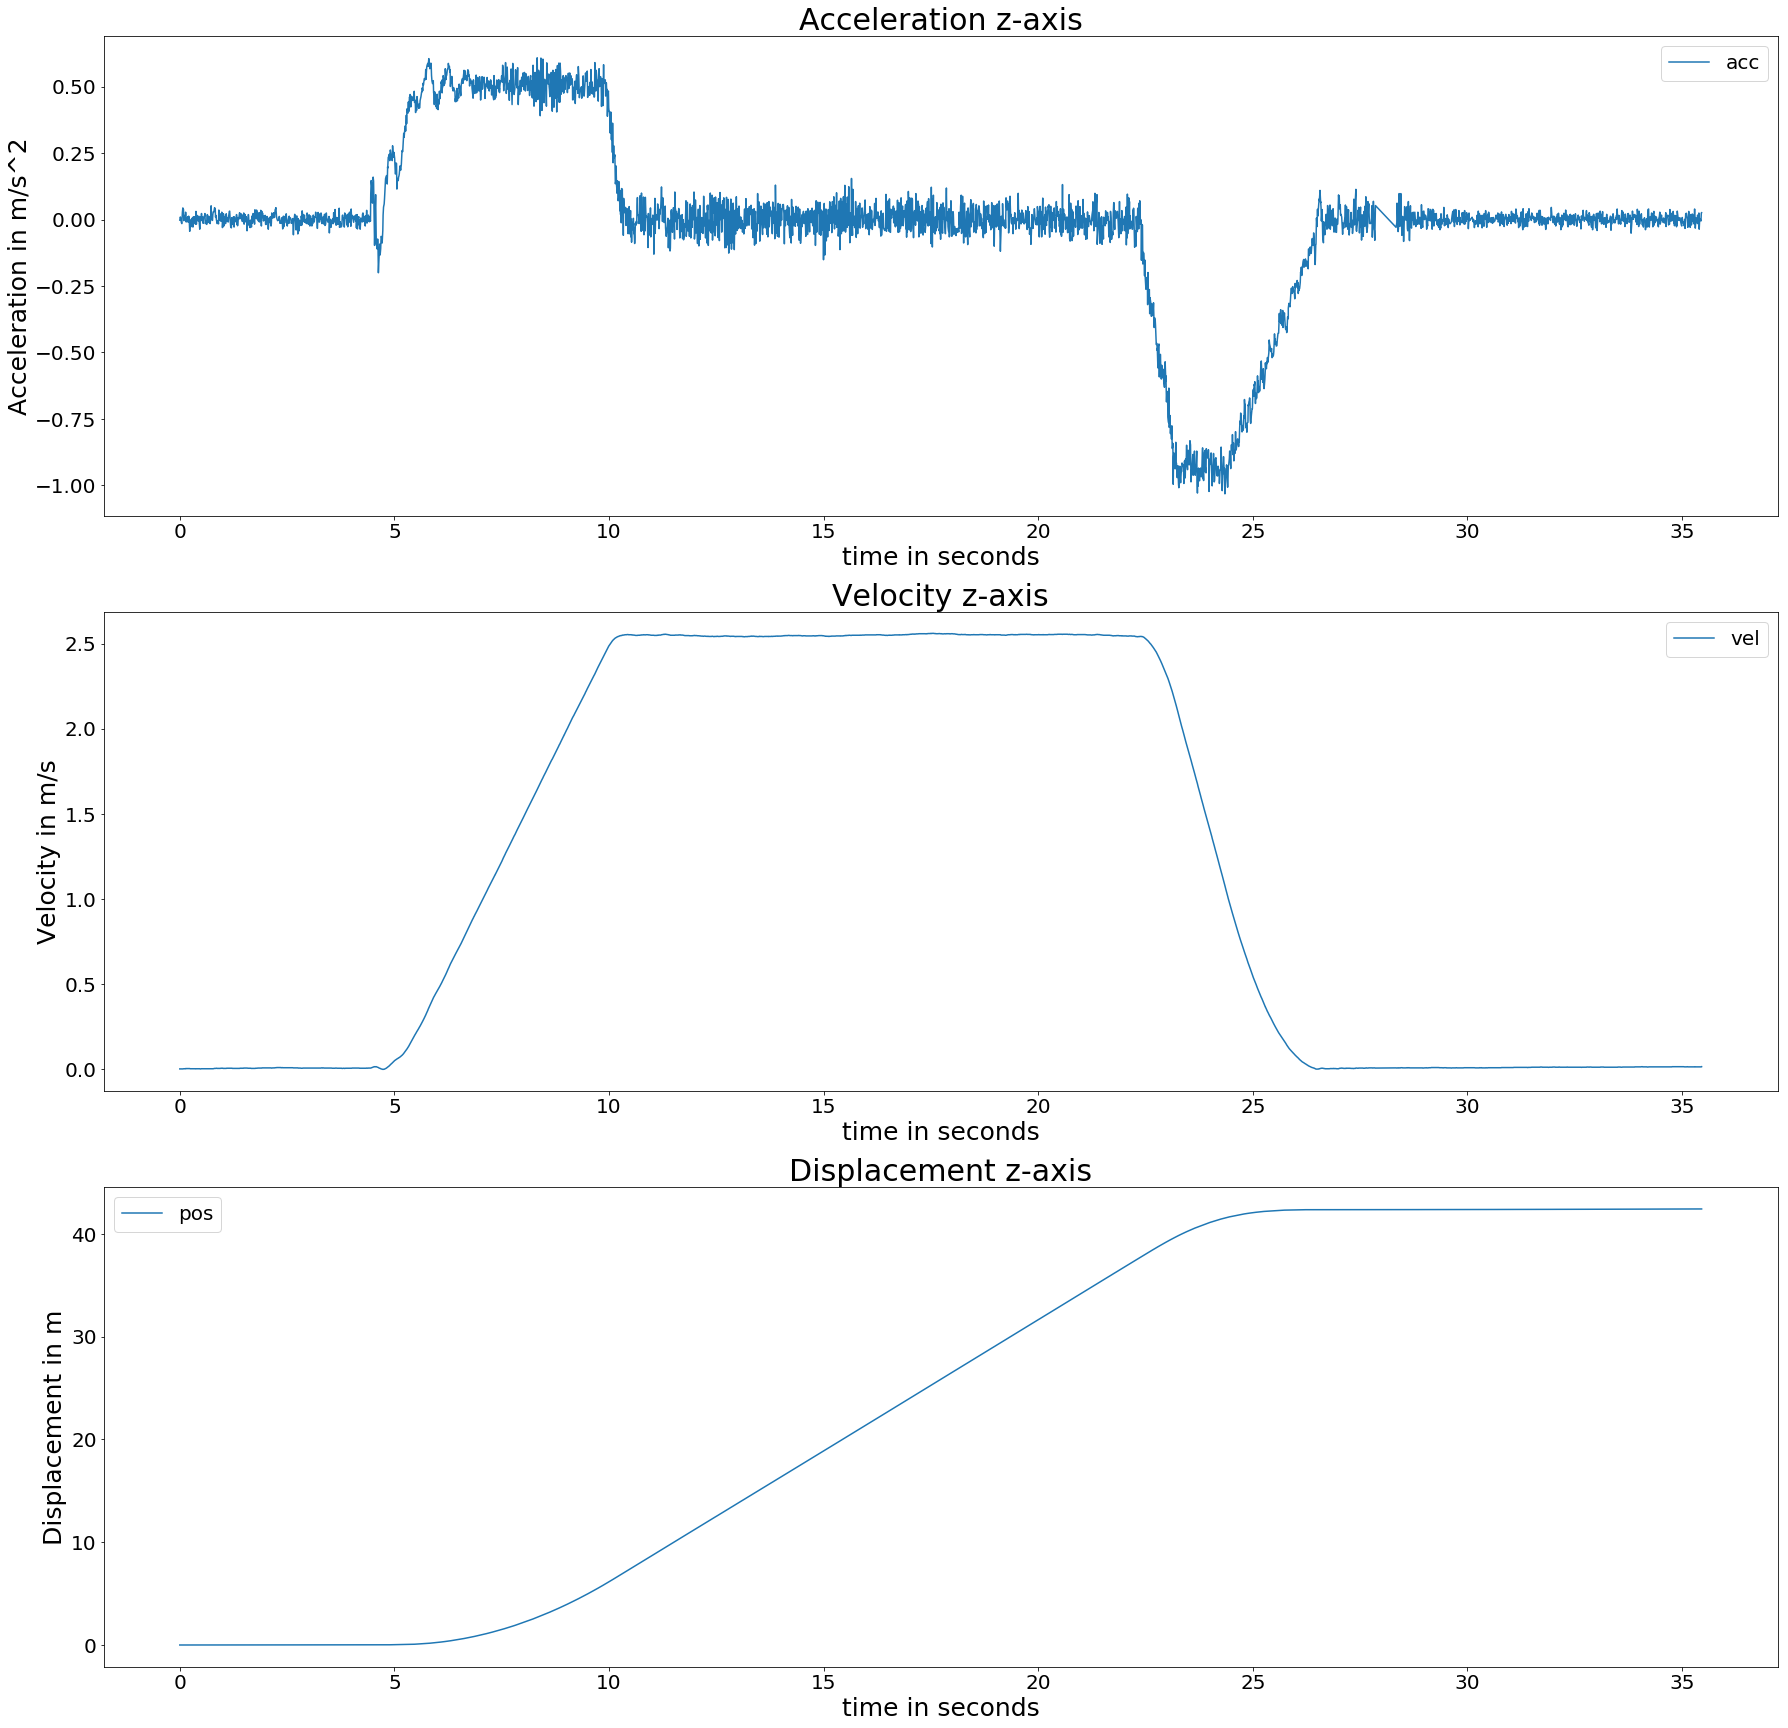

Run 3


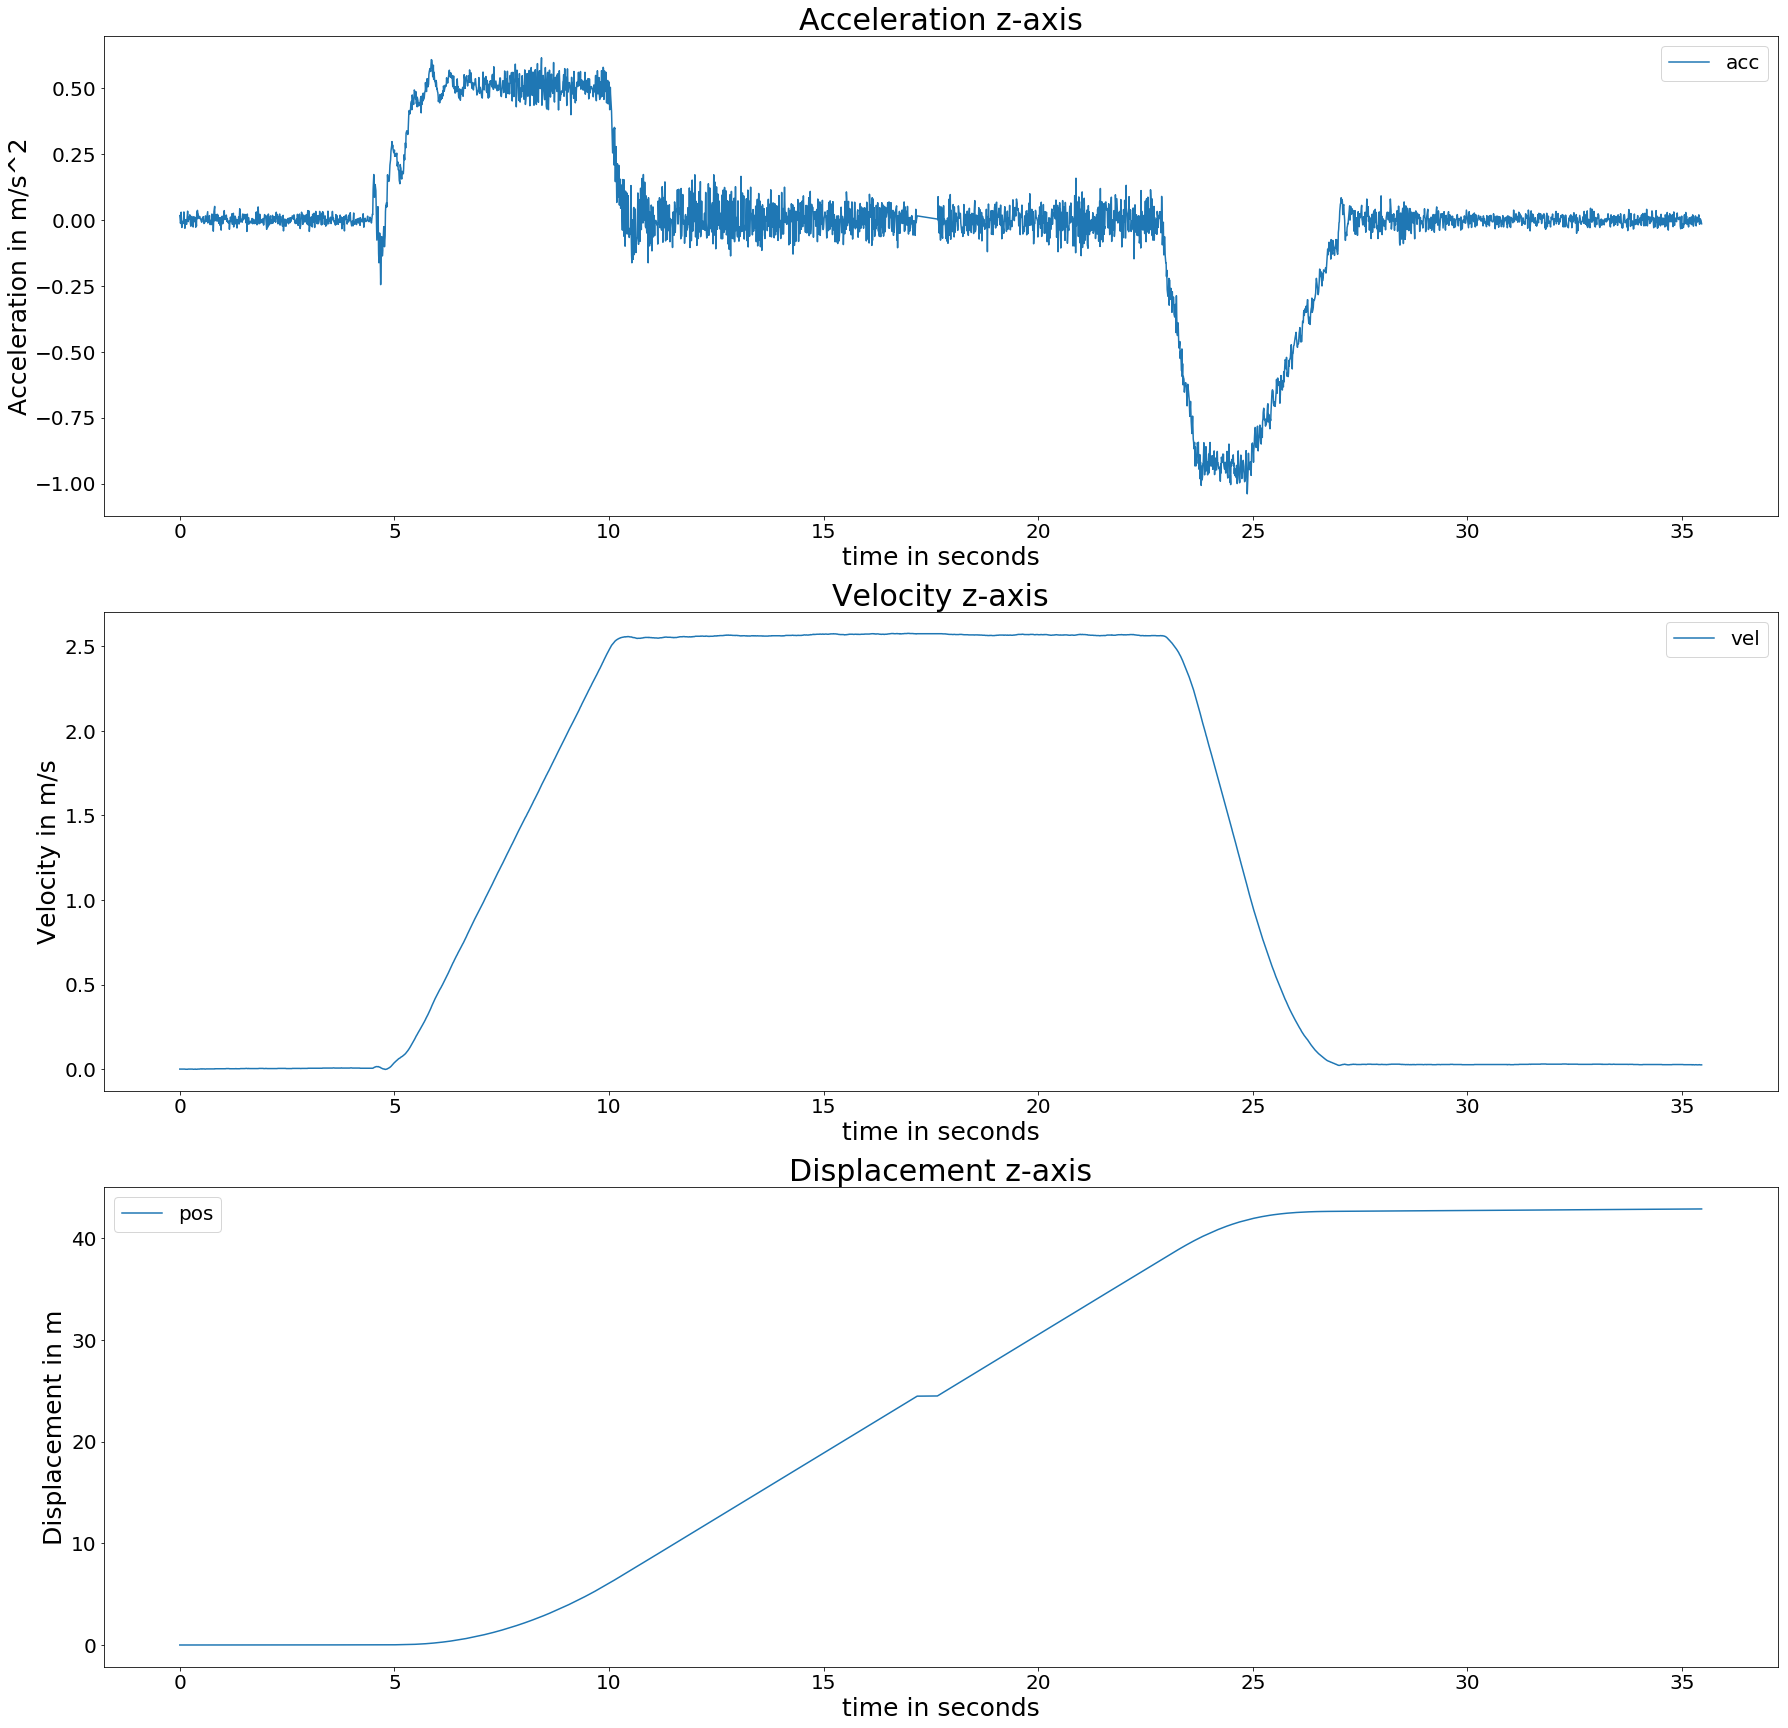

Run 4


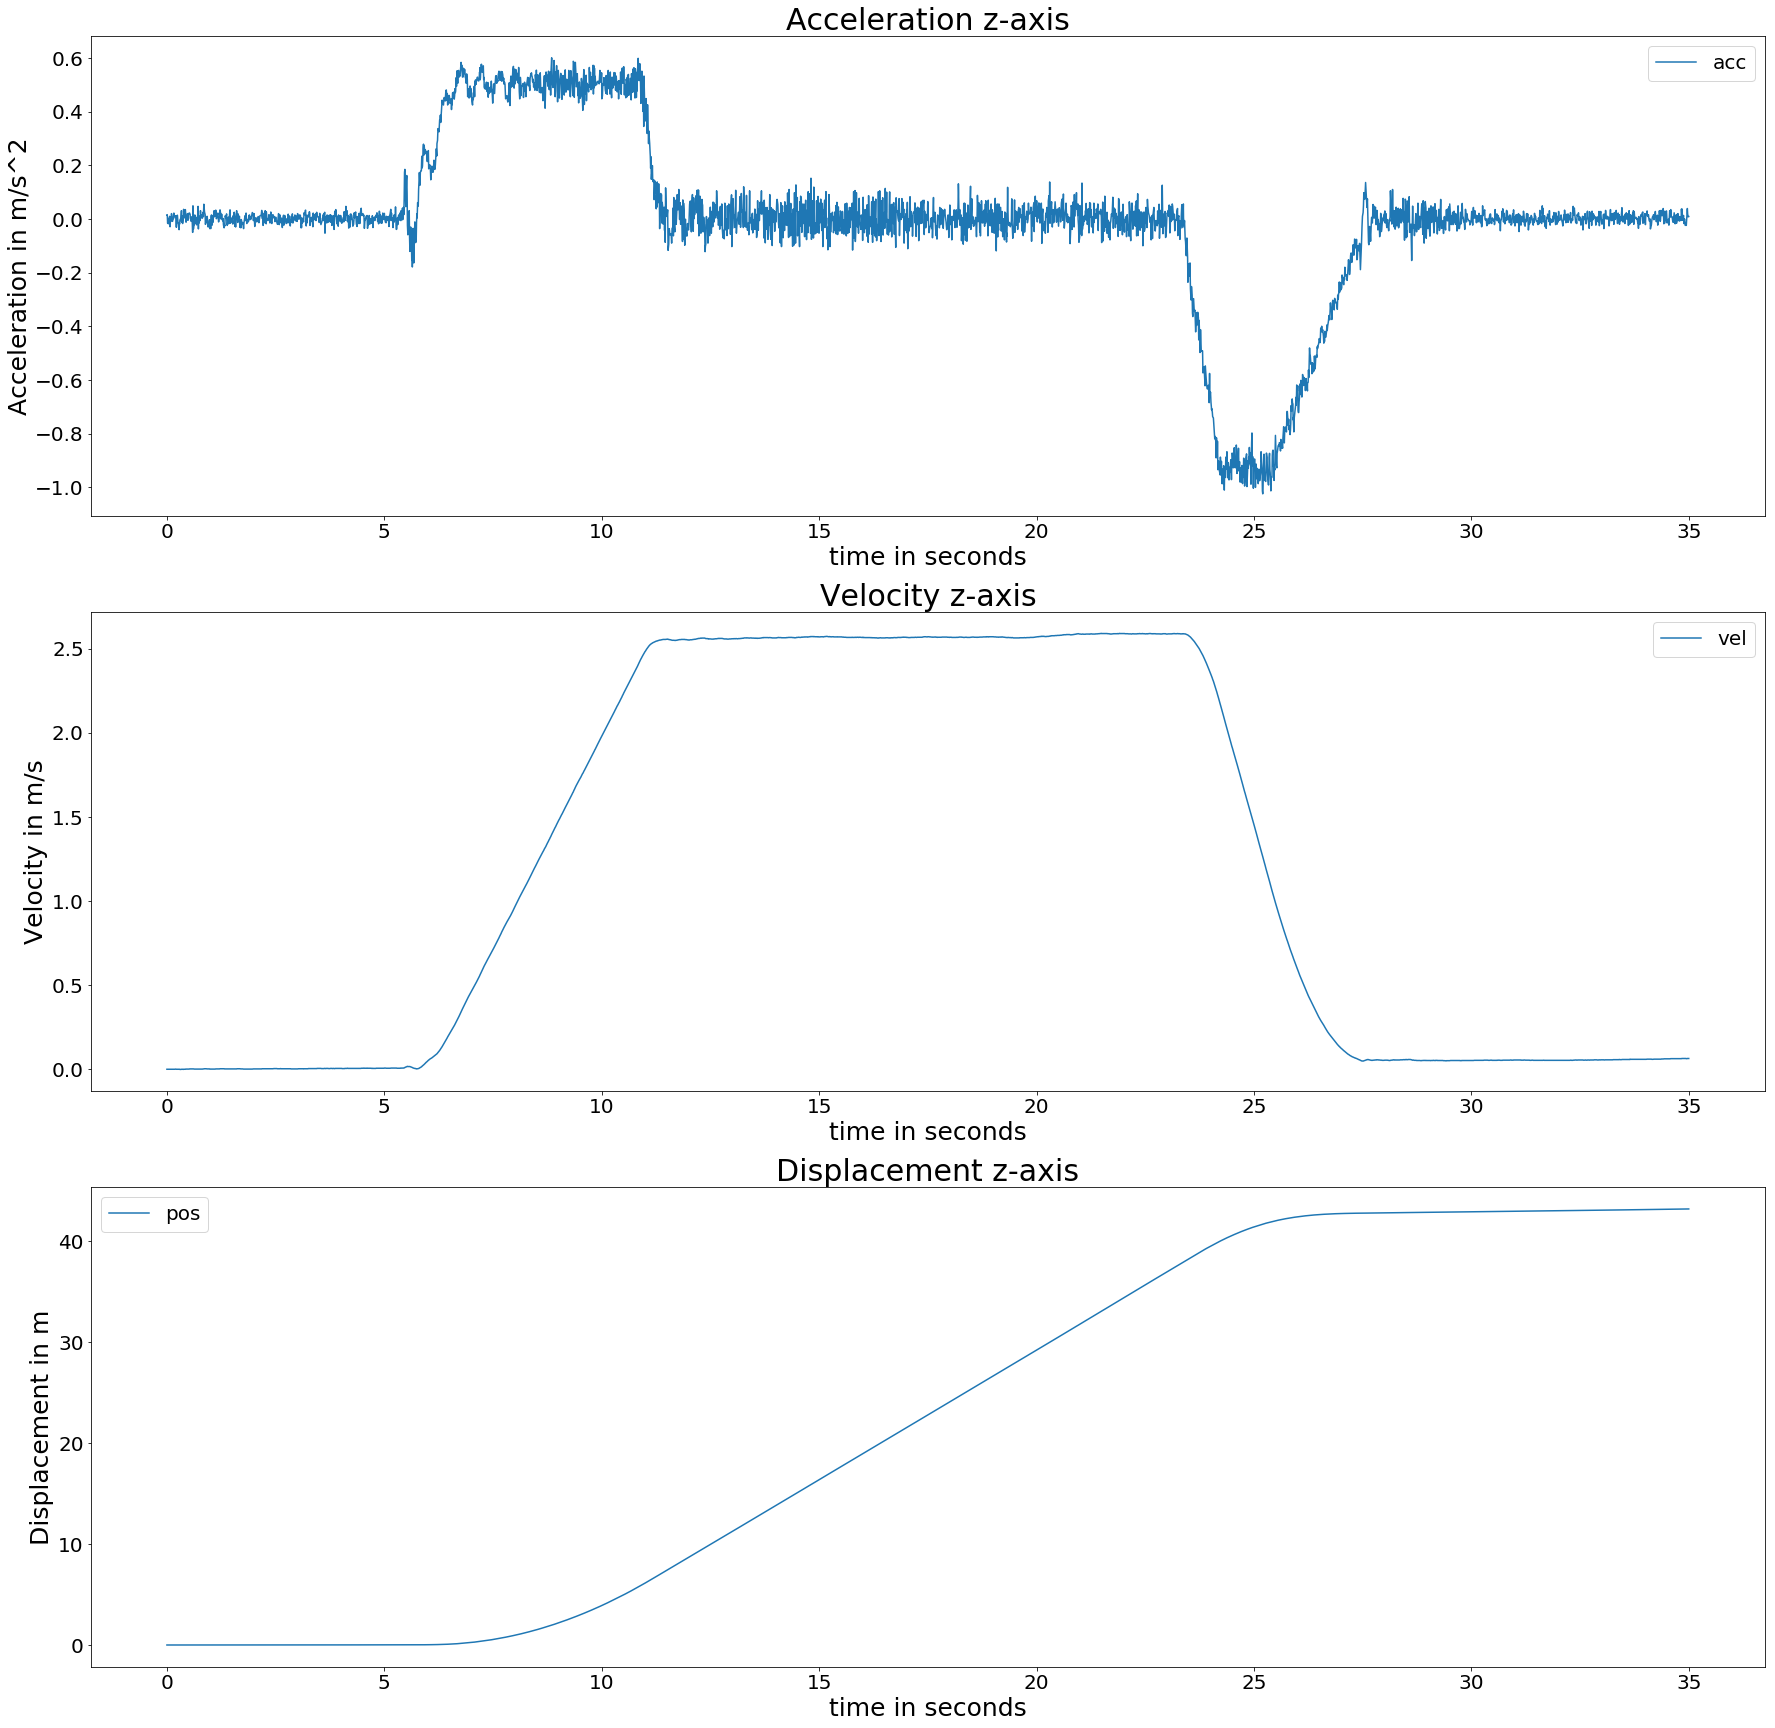

In [9]:
imu_data = data_4imu_no_filter
print("Plots 4 runs for 6 IMUs using 1d transformation with multiple filters")
for run in range(4):
    print("Run %d" % (run + 1))
    run_dict = imu_data[run]
    plot_run_data(run_dict)